<a href="https://colab.research.google.com/github/taceroc/light_echo_modeling/blob/main/delta_phi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# %matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib


from astropy.coordinates import (cartesian_to_spherical, SkyCoord, Distance, Galactic, EarthLocation, AltAz, CartesianRepresentation, SphericalRepresentation)
from astropy import units as u
# Calculate observer's local sidereal time (LST)
from astropy.time import Time
from astropy.coordinates import EarthLocation

%config InlineBackend.figure_format='retina'

In [67]:
def scatter_phase_function(g = 0, scatter_angle = np.pi / 2):
  mu =  np.cos(scatter_angle)
  return ((1 - g**2) / (1 + g**2  - 2 * g * mu)**(3/2) ) / 4 * np.pi

In [68]:
Deltat = [250] # days
dtoy = 0.00273973 # 1 day = 0.00273973 y
Deltat_y = np.array(Deltat) * dtoy
z0 = [-0.10, 0, 0.3, 1] # pc
pctoly = 3.26156 # 1pc = 3.26156 light-year
z0ly = np.array(z0) * pctoly
# -- point where the plane-parallel slab of dust intersects the line of sight
# -- inclination of the plane, is perpendicular to the line of sight (I am using 89 so the tangent don't die)
alpha = 20 * np.pi/180  # angle of tilt in radians
a = np.tan(alpha)
dt0 = 50 * dtoy
dz0 = 0.02 * pctoly # in ly

c = 1 # in light-year / year
pctom = 3.086e+16
n = 2.3 * (100 ** 3) #m-3
n = n * ( pctom ** 3 ) / ( pctoly ** 3 )
sigma = 5e-22 / (100 ** 2) #m2 #RR paper
sigma = ( sigma / ( (pctom ** 2) ) ) * ( pctoly ** 2 )
albedo = 0.6
Fphi = scatter_phase_function()
print(Fphi, 1/4 * np.pi)
# -- distance source - observer
dkpc = 5 #kpc
d = dkpc * 1000 * pctoly

k = sigma * albedo * Fphi
# L = 15,000 x 3.9e26 # watts = kg m ^2 / s^3
L = (15000 * 3.9e36) * ((60 * 60 * 24 * 365) ** 3) * (pctoly ** 2) / (pctom ** 2)
Ir = k * L * c / (4 * np.pi * (dkpc * 1000 * pctoly)**2)

0.7853981633974483 0.7853981633974483


In [4]:
n

1.9482266706875965e+54

In [5]:
x = np.linspace(-10,10,100)
# y = np.linspace(-10,10,100)
# z = np.linspace(-10,10,100)
ct = 280 * dtoy

Equation of the paraboloid,

$x^2 + y^2 = 2zct + (ct)^2$

$z = \frac{x^2 + y^2 - (ct)^2}{2ct}$

In [6]:
# y = 0
z = (x**2 - ct**2) / (2 * ct)

Text(0, 0.5, 'x')

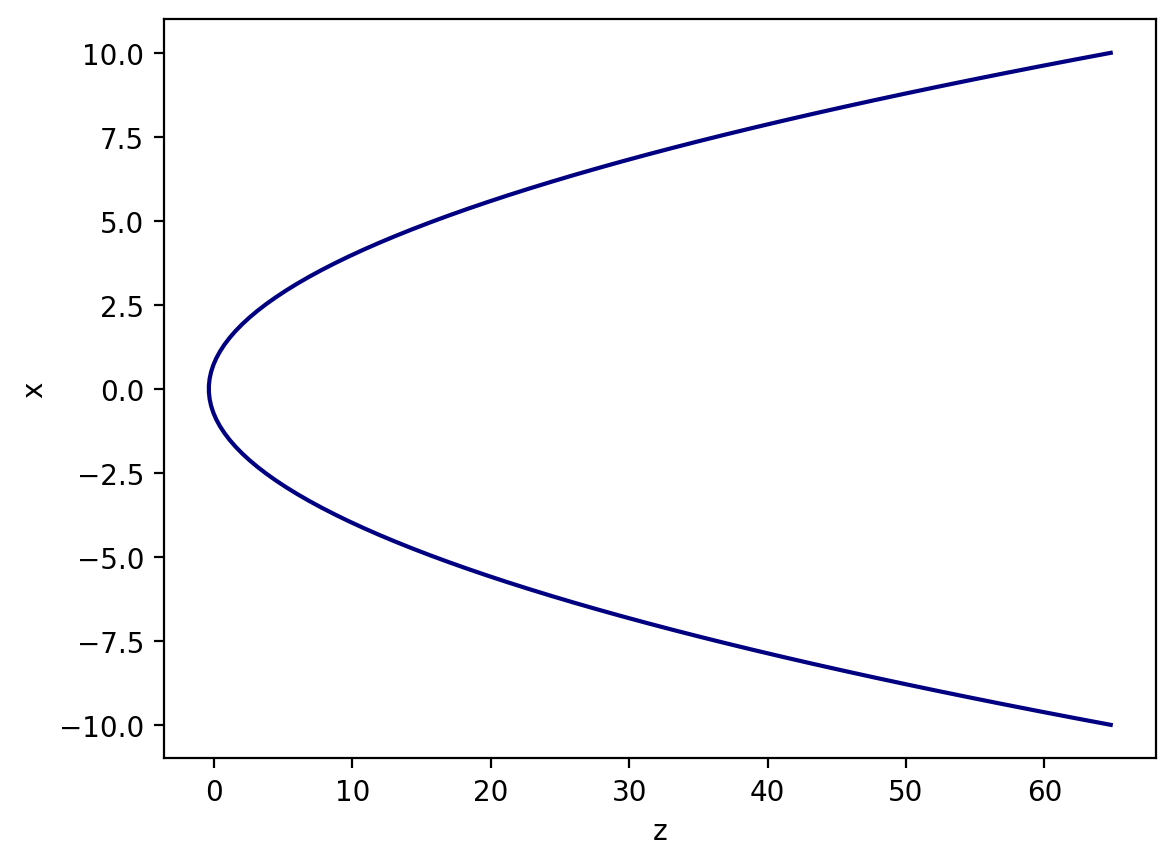

In [7]:
plt.plot(z, x, c = "navy", label = "ct=1");
plt.xlabel("z")
plt.ylabel("x")

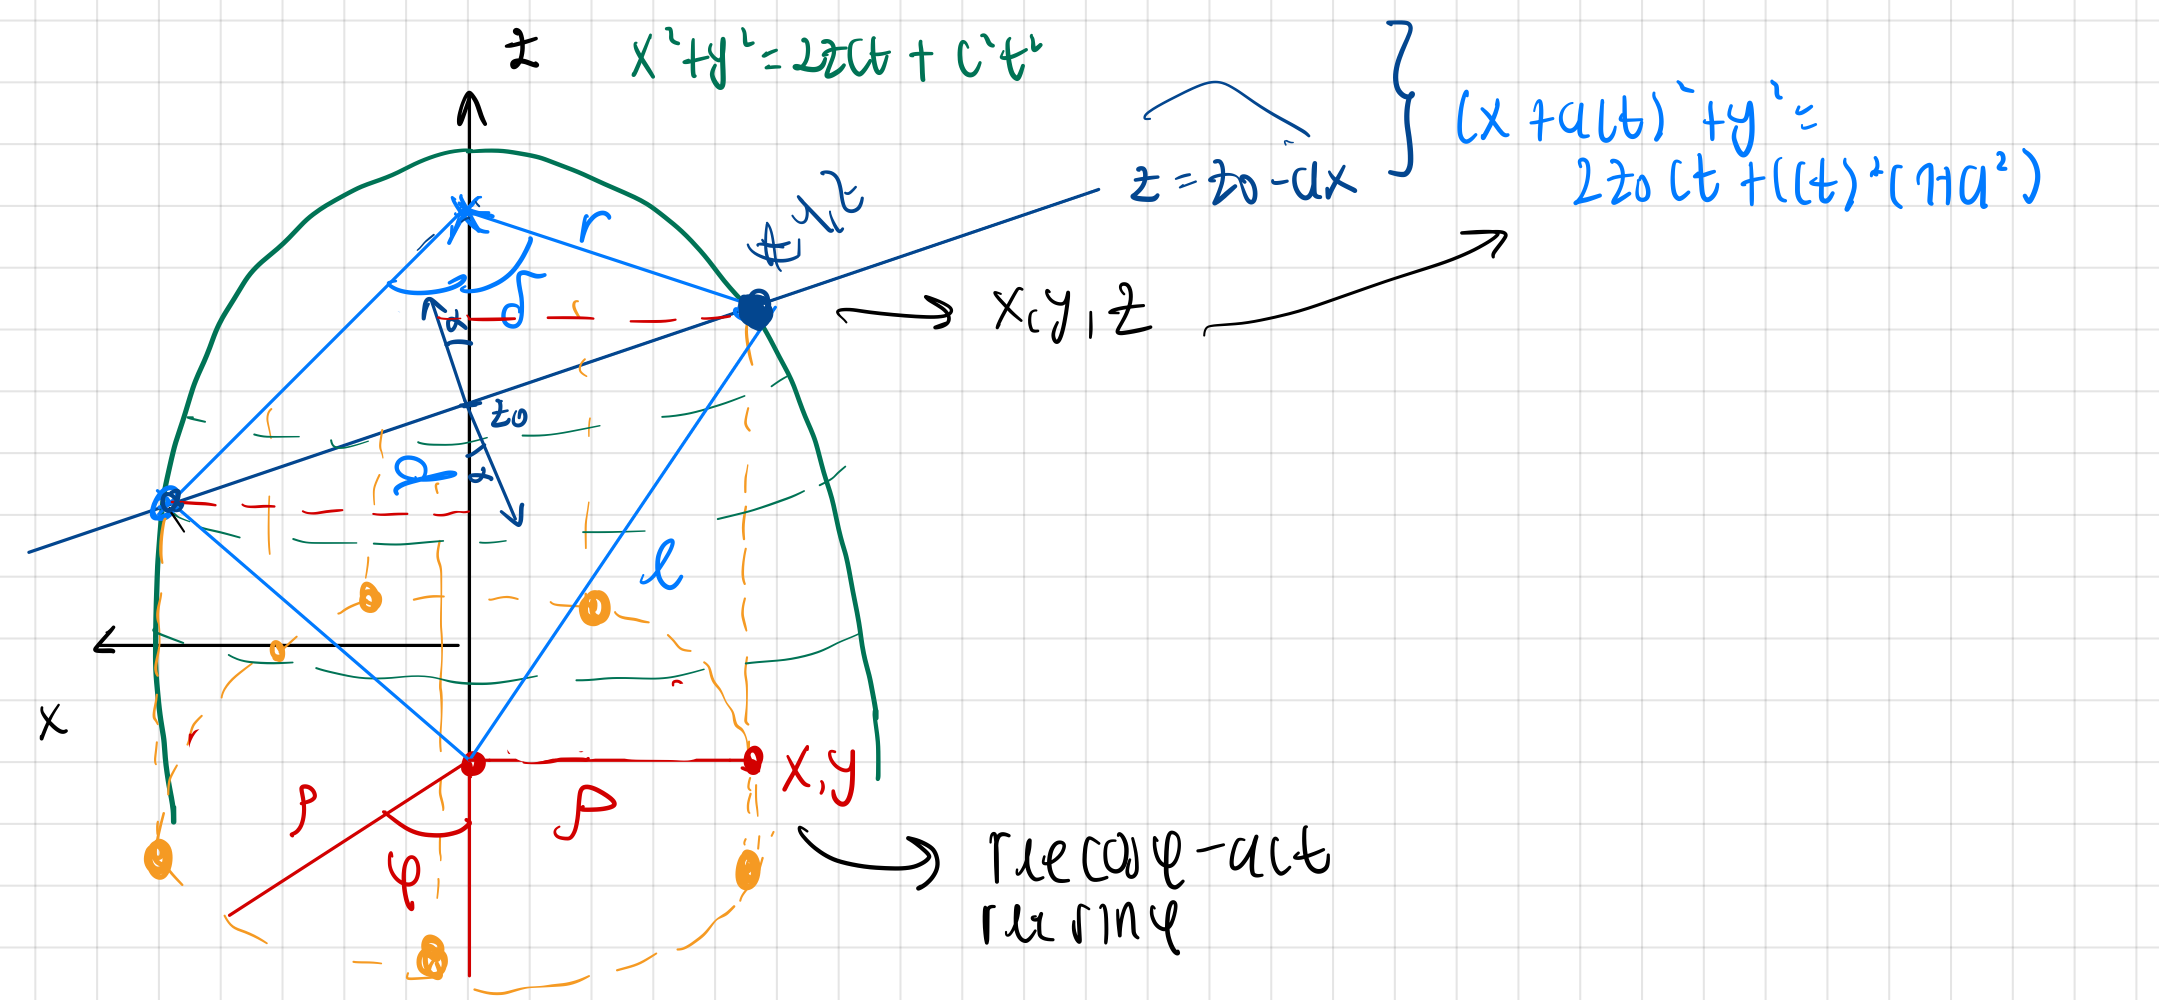

$\cos \delta = \frac{z}{\sqrt{x^2 + y^2 + z^2}}$

$r = x,y,z$: position of the dust from the focii

In [8]:
# y = 0
cos_delta = z[::10] / np.sqrt(x[::10]**2  + z[::10]**2)

In [9]:
delta_rad = np.arccos(cos_delta)
delta_deg = delta_rad * 180 / np.pi

better with tan2

In [10]:
tan2_delta = np.arctan2(x[::10], z[::10]) * 180 / np.pi

Plot the paraboloid and some x

Text(0, 0.5, 'x')

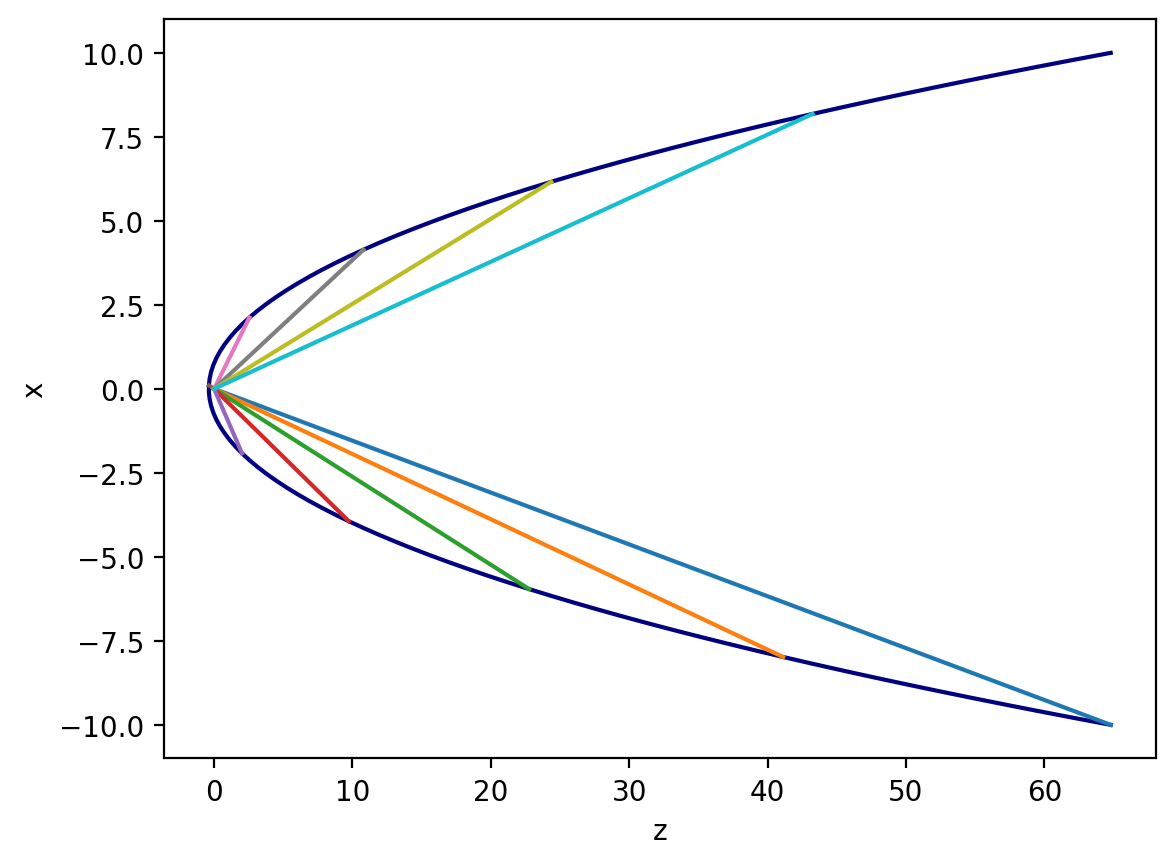

In [11]:
plt.plot(z, x, c = "navy", label = "ct=1");
plt.plot([np.zeros(10), z[::10]],[np.zeros(10), x[::10]])

plt.xlabel("z")
plt.ylabel("x")

$(x + act)^2 + y^2 = 2z_0ct + (ct)^2 (1 + a^2)$

$z = z0 - ax$

Plot the paraboloid in $y = 0$ and the plane

Text(0, 0.5, 'x')

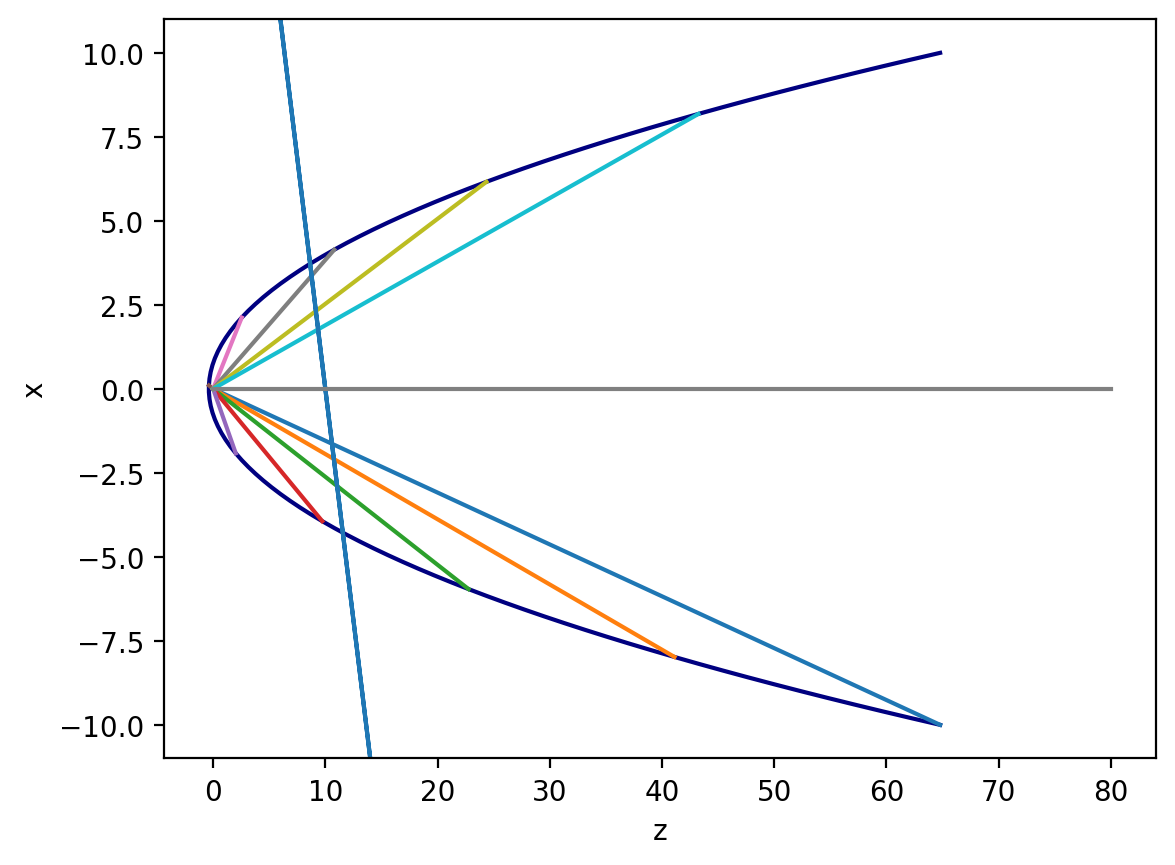

In [12]:
z0 = 10
plt.plot(z, x, c = "navy", label = "ct=1");
plt.plot([np.zeros(10), z[::10]],[np.zeros(10), x[::10]])
plt.plot(z[::10], -(z[::10]- z0) / a)
plt.plot([0,80], [0,0], color="grey")

plt.ylim(-11,11)
plt.xlabel("z")
plt.ylabel("x")

$(x_{inter} + act)^2 + y^2 = 2z_0ct + (ct)^2(1+a^2)$

$x_{inter} = \sqrt{ 2z_0ct + (ct)^2(1+a^2) - y^2} - act $

In [13]:
# x intersection for y = 0
np.sqrt(2 * z0 * ct + (ct)**2 * (1 + a**2)) - a * ct,  -np.sqrt(2 * z0 * ct + (ct)**2 * (1 + a**2)) - a * ct,

x_inter_1 = np.sqrt(2 * z0 * ct + (ct)**2 * (1 + a**2)) - a * ct
x_inter_2 = -np.sqrt(2 * z0 * ct + (ct)**2 * (1 + a**2)) - a * ct

Text(0, 0.5, 'x')

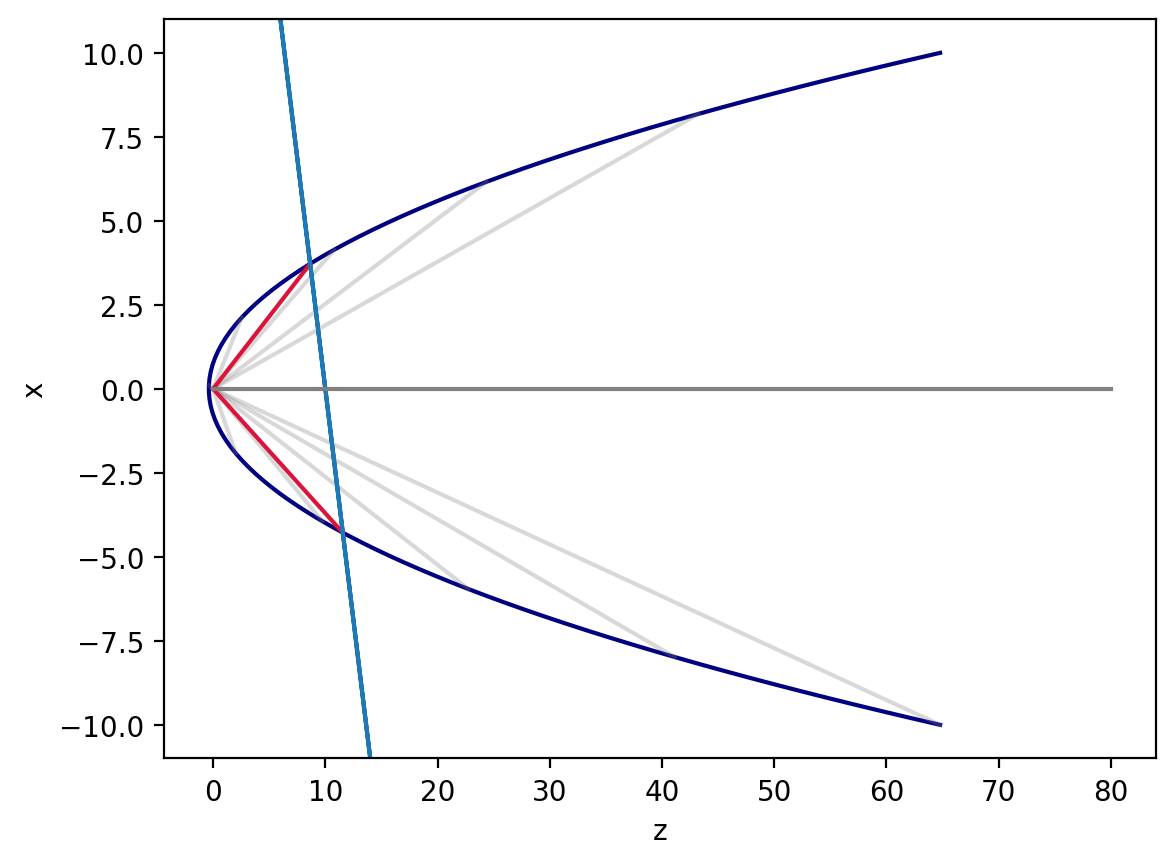

In [14]:
z0 = 10
plt.plot(z, x, c = "navy", label = "ct=1");
plt.plot([np.zeros(10), z[::10]],[np.zeros(10), x[::10]], alpha = 0.3, color = "grey")
plt.plot([0, z0 - a*x_inter_1], [0, x_inter_1], color = "crimson")
plt.plot([0, z0 - a*x_inter_2], [0, x_inter_2], color = "crimson")

plt.plot(z[::10], -(z[::10]- z0) / a)
plt.plot([0,80], [0,0], color="grey")

plt.ylim(-11,11)
plt.xlabel("z")
plt.ylabel("x")

Mark the intersection paraboloid-plane for y = 0

Text(0, 0.5, 'x')

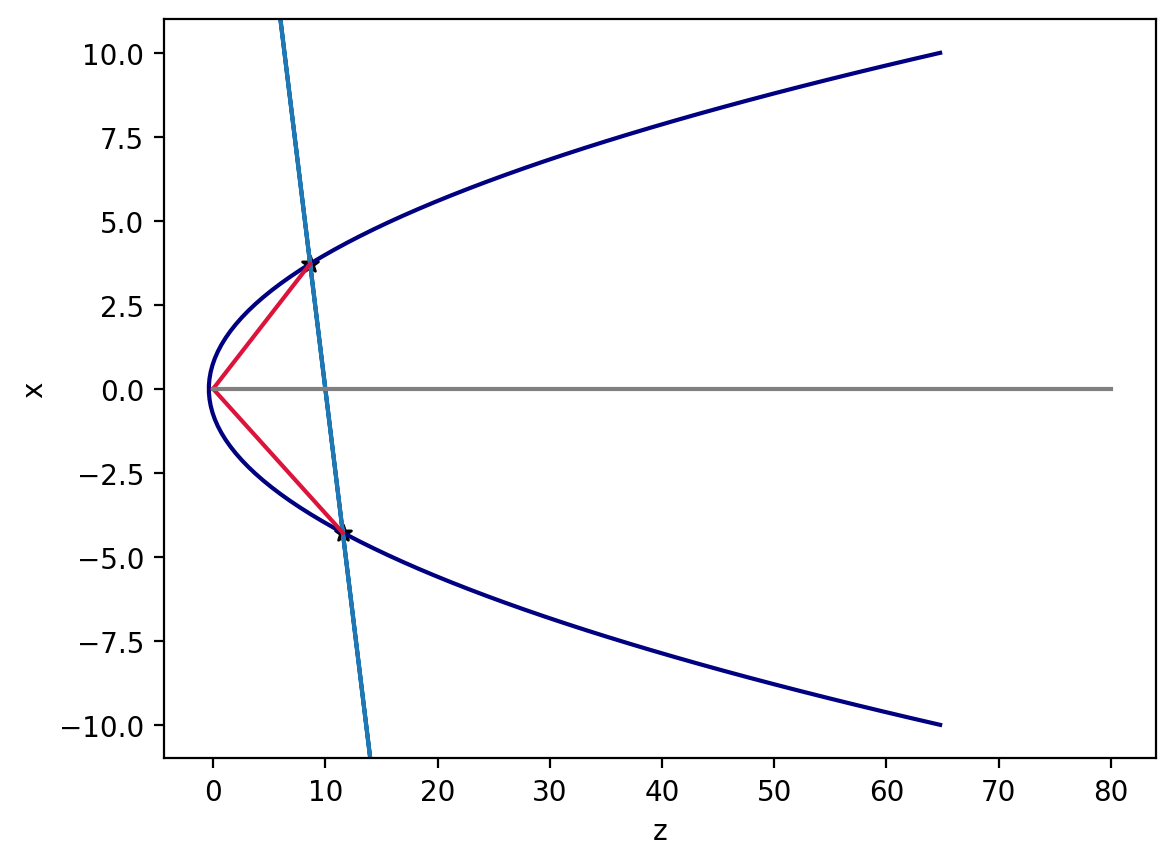

In [15]:
plt.plot(z, x, c = "navy", label = "ct=1");
# plt.plot([np.zeros(10), z[::10]],[np.zeros(10), x[::10]])
plt.plot(z[::10], -(z[::10]- z0) / a)
plt.scatter(z0 - a*(np.sqrt(2 * z0 * ct + (ct)**2 * (1 + a**2)) - a * ct), np.sqrt(2 * z0 * ct + (ct)**2 * (1 + a**2)) - a * ct, marker = "*", color = "black")
plt.scatter(z0 - a*(-np.sqrt(2 * z0 * ct + (ct)**2 * (1 + a**2)) - a * ct), -np.sqrt(2 * z0 * ct + (ct)**2 * (1 + a**2)) - a * ct, marker = "*", color = "black")
plt.plot([0, z0 - a*x_inter_1], [0, x_inter_1], color = "crimson")
plt.plot([0, z0 - a*x_inter_2], [0, x_inter_2], color = "crimson")

plt.plot([0,80], [0,0], color="grey")

plt.ylim(-11,11)
plt.xlabel("z")
plt.ylabel("x")

In [16]:
r_le = np.sqrt(2 * z0 * ct + (ct)**2 * (1 + a**2))

$(x+act)^2 + y^2 = r_{le}^2$

In [17]:
r_le2 = 2 * z0 * ct + (ct)**2 * (1 + a**2)

The y must be between the radii of the LE, because $x_{inter} = \sqrt{ r_{le}^2 - y^2} - act $

(-4.680437645319342, 4.122016750160703, -4.401221757068824, 4.401221757068824)

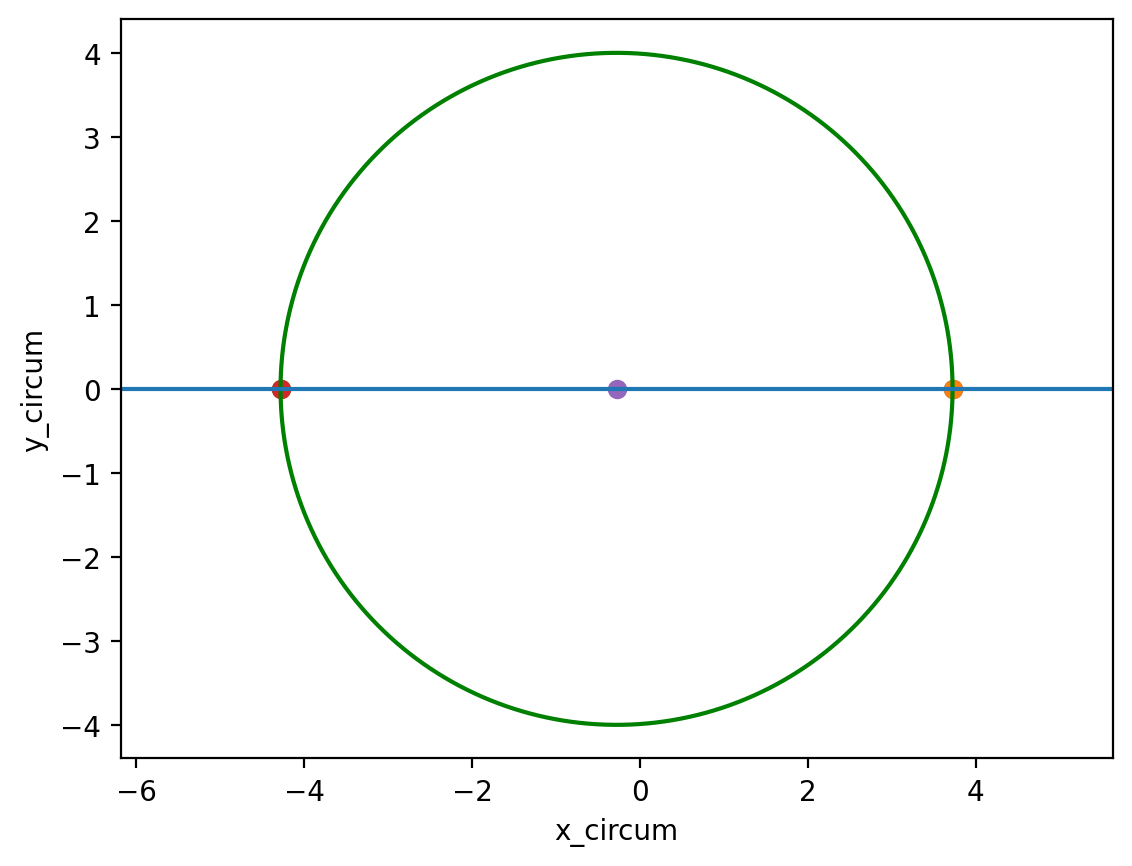

In [18]:
angle = np.linspace(0, 2 * np.pi, 1000)
plt.plot(r_le * np.cos(angle) - a * ct, r_le * np.sin(angle), c = "green")
plt.scatter(r_le * np.cos(np.arctan(0/x_inter_1)) - a * ct, r_le * np.sin(np.arctan(0/x_inter_1)))
plt.scatter(r_le * np.cos(np.arctan(0/x_inter_2)) - a * ct, r_le * np.sin(np.arctan(0/x_inter_2)))

plt.scatter(r_le * np.cos(-np.arctan(0/x_inter_1) +  np.pi) - a * ct, r_le * np.sin(-np.arctan(0/x_inter_1) + np.pi ))
plt.scatter(r_le * np.cos(-np.arctan(0/x_inter_2) + np.pi) - a * ct, r_le * np.sin(-np.arctan(0/x_inter_2) + np.pi ))



plt.axhline(0)
plt.scatter(-a*ct, 0)

plt.xlabel("x_circum")
plt.ylabel("y_circum")

plt.axis('equal')

In [19]:
y_gr = np.linspace(-r_le,r_le,800)
y_com = np.linspace(-r_le, -np.sqrt(r_le2 -  (a * ct)**2), 100)
y_com0= np.linspace(np.sqrt(r_le2 -  (a * ct)**2), r_le, 100)

y = np.concatenate((y_gr, y_com, y_com0))

x_inter = np.zeros((len(y)))
x_inter_n = np.zeros((len(y)))

for jj in range(len(y)):
  x_inter[jj] = np.sqrt(r_le2 - y[jj]**2) - a * ct
  x_inter_n[jj] = -np.sqrt(r_le2 - y[jj]**2) - a * ct

 The angle phi, and the $X$, $Y$ coordiantes in the projected plane

 $Y = r_{le} \sin \phi$

 $X = r_{le} \cos \phi - act$

 $X + act = x_{inter}$

 $\sin \phi = \frac{Y}{r_{le}}$

 $\cos \phi = \frac{X + act}{r_{le}}$

 $\tan \phi = \frac{Y}{X + act}$

In [20]:
np.arctan(y[3]/x_inter[3]), -np.arctan(y[3]/x_inter[3]) +  np.pi, np.cos(np.arctan(y[3]/x_inter[3])), np.cos(-np.arctan(y[3]/x_inter[3]) +  np.pi)

(-1.5179105074270411,
 4.6595031610168345,
 0.052861170003336934,
 -0.05286117000333684)

(-4.680416871860335, 4.122015760948369, -4.401221757068824, 4.401221757068824)

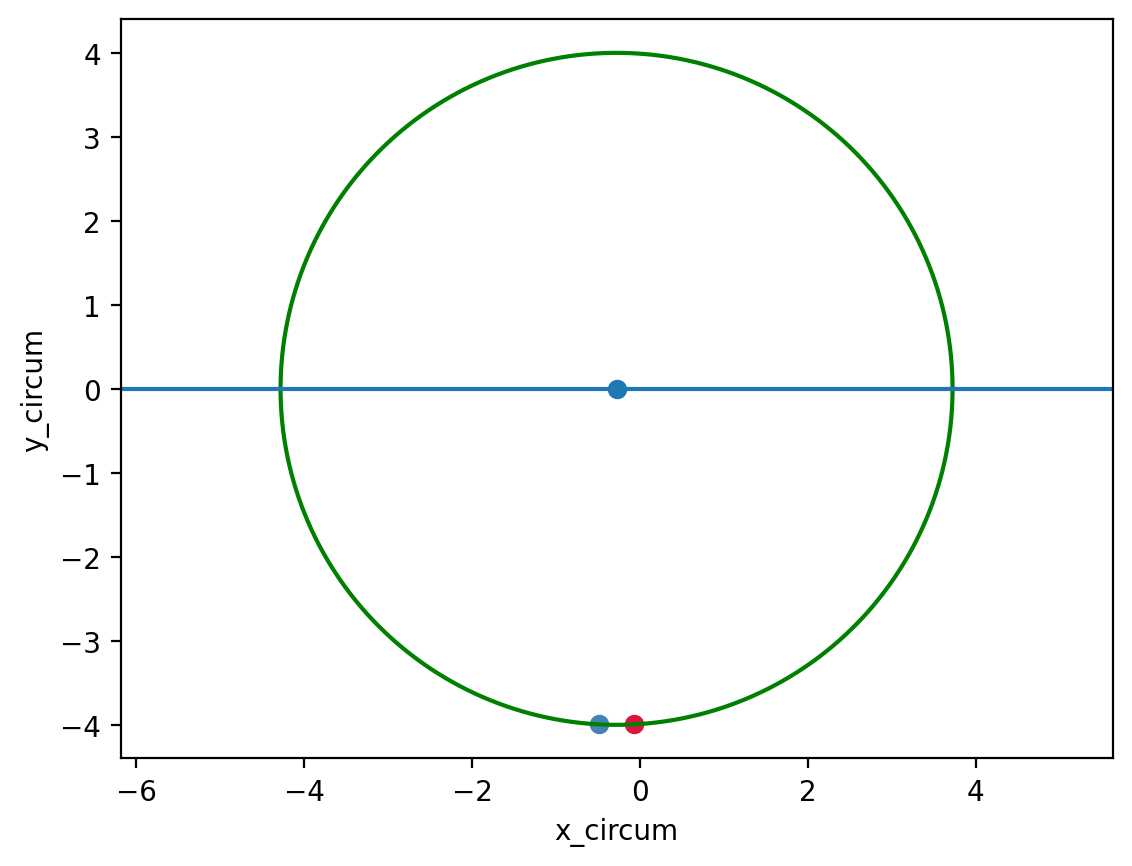

In [21]:
angle = np.linspace(0, 2 * np.pi, 1000)
plt.plot(r_le * np.cos(angle) - a * ct, r_le * np.sin(angle), c = "green")
plt.scatter(r_le * np.cos(np.arctan(y[3]/x_inter[3])) - a * ct, r_le * np.sin(np.arctan(y[3]/x_inter[3])), color = "crimson")
# plt.scatter(r_le * np.cos(np.arctan(y[3]/x_inter_n[3])) - a * ct, r_le * np.sin(np.arctan(y[3]/x_inter_n[3])), color = "crimson")

plt.scatter(r_le * np.cos(-np.arctan(y[3]/x_inter[3]) +  np.pi) - a * ct, r_le * np.sin(-np.arctan(y[3]/x_inter[3]) + np.pi ), color = "steelblue")
# plt.scatter(r_le * np.cos(-np.arctan(y[3]/x_inter_n[3]) + np.pi) - a * ct, r_le * np.sin(-np.arctan(y[3]/x_inter_n[3]) + np.pi ), color = "steelblue")


plt.axhline(0)
plt.scatter(-a*ct, 0)

plt.xlabel("x_circum")
plt.ylabel("y_circum")


plt.axis('equal')

(-4.680433661662046, 4.122012766503406, -4.401227197740022, 4.401227197740022)

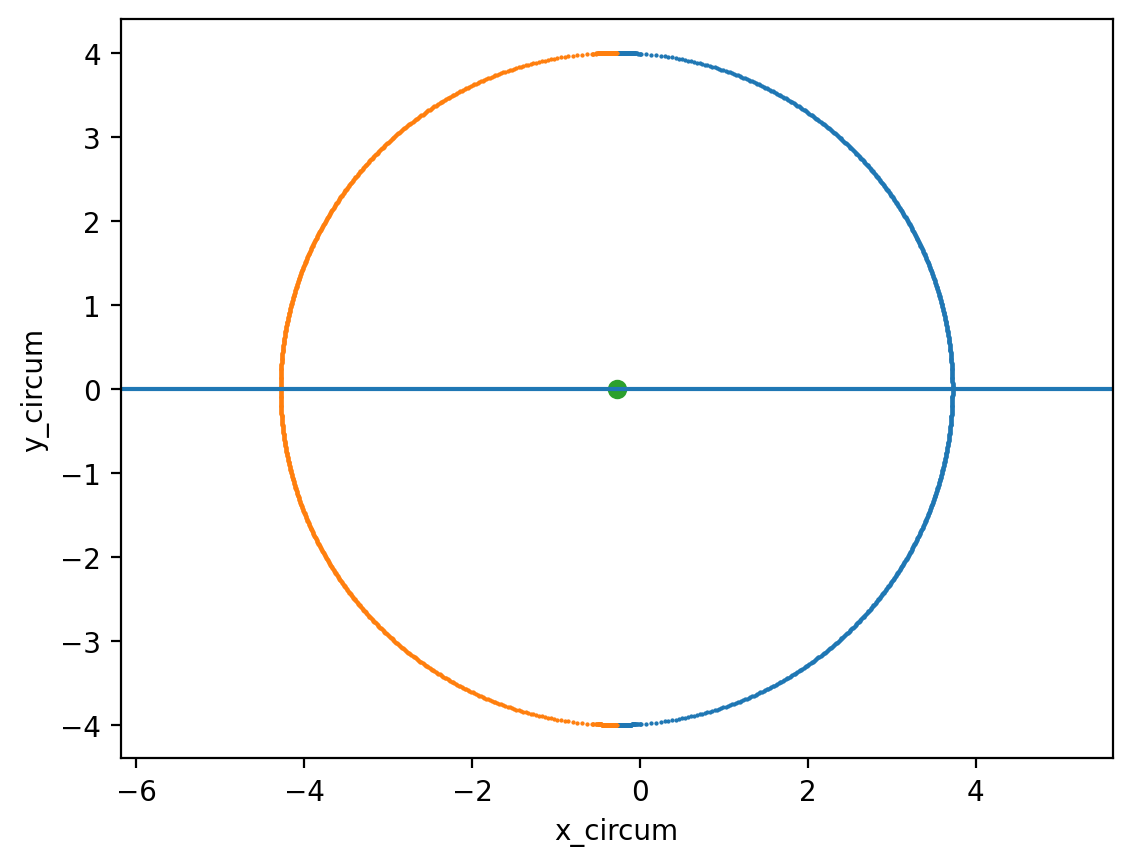

In [22]:
angle = np.linspace(0, 2 * np.pi, 1000)
# plt.plot(r_le * np.cos(angle) - a * ct, r_le * np.sin(angle), c = "green")
plt.scatter(r_le * np.cos(np.arctan(y/x_inter)) - a * ct, r_le * np.sin(np.arctan(y/x_inter)), s = 0.3)
# plt.scatter(r_le * np.cos(np.arctan(y/x_inter_n)) - a * ct, r_le * np.sin(np.arctan(y/x_inter_n)))

plt.scatter(r_le * np.cos(-np.arctan(y/x_inter) +  np.pi) - a * ct, r_le * np.sin(-np.arctan(y/x_inter) + np.pi ), s= 0.3)
# plt.scatter(r_le * np.cos(-np.arctan(y/x_inter_n) + np.pi) - a * ct, r_le * np.sin(-np.arctan(y/x_inter_n) + np.pi ))



plt.axhline(0)
plt.scatter(-a*ct, 0)

plt.xlabel("x_circum")
plt.ylabel("y_circum")

plt.axis('equal')

In [24]:
n

1.9482266706875965e+54

# Clean try

In [25]:
z0 = 10
ct = 280 * dtoy
r_le2 = 2 * z0 * ct + (ct)**2 * (1 + a**2)
r_le = np.sqrt(2 * z0 * ct + (ct)**2 * (1 + a**2))

In [26]:
x = np.linspace(-10,10,100)
y = np.linspace(-r_le, r_le, 100)

In [27]:
z = np.zeros((len(y), len(x)))
for jj in range(len(y)):
  z[jj, :] = ( x**2 - (ct)**2 + y[jj]**2 ) / (2 * ct)

In [28]:
delta = np.arctan2(x,z[1,:])


In [29]:
x_inter = np.sqrt(r_le2 - y**2) - a * ct
x_inter_n = -1*np.sqrt(r_le2 - y**2) - a * ct


z_inter = z0 - a * x_inter
z_inter_n = z0 - a * x_inter_n

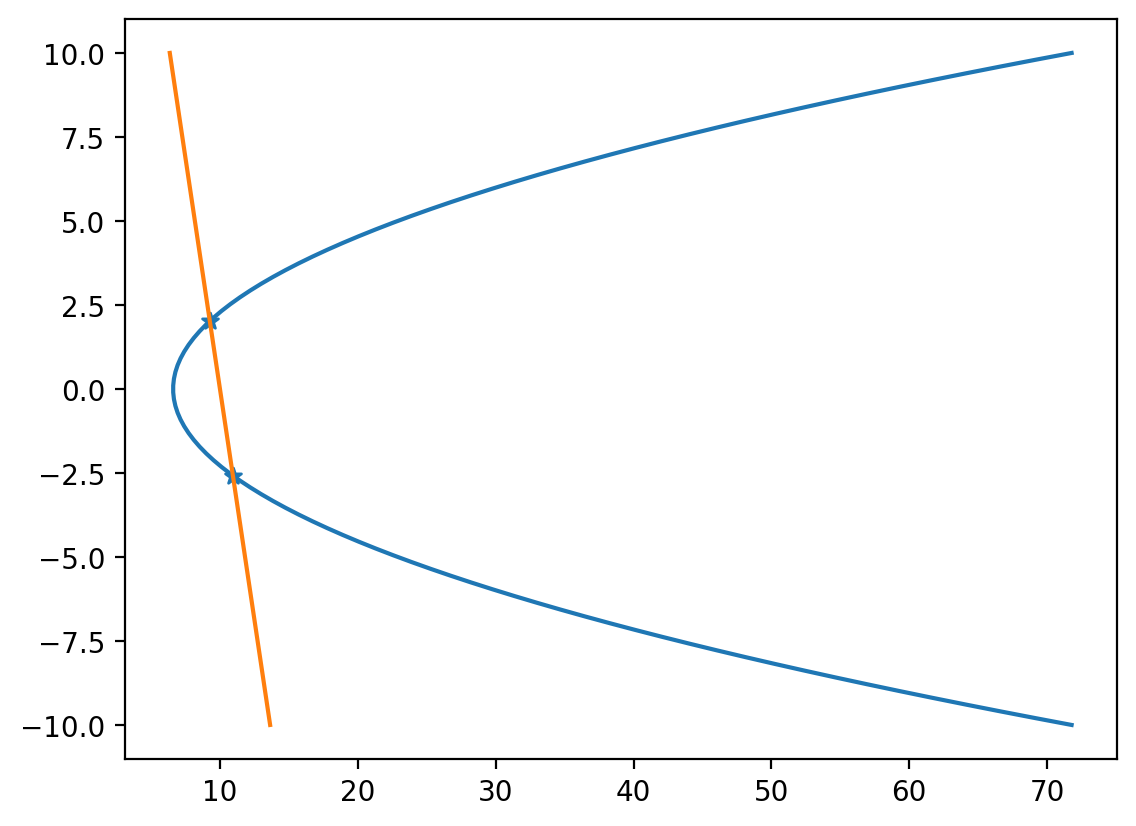

In [30]:
plt.plot(z[90,:], x)
plt.plot(z0 - a*x, x)

# plt.scatter([z_inter], [x_inter])
plt.scatter([z_inter[90], z_inter_n[90]], [x_inter[90], x_inter_n[90]], marker = "*")

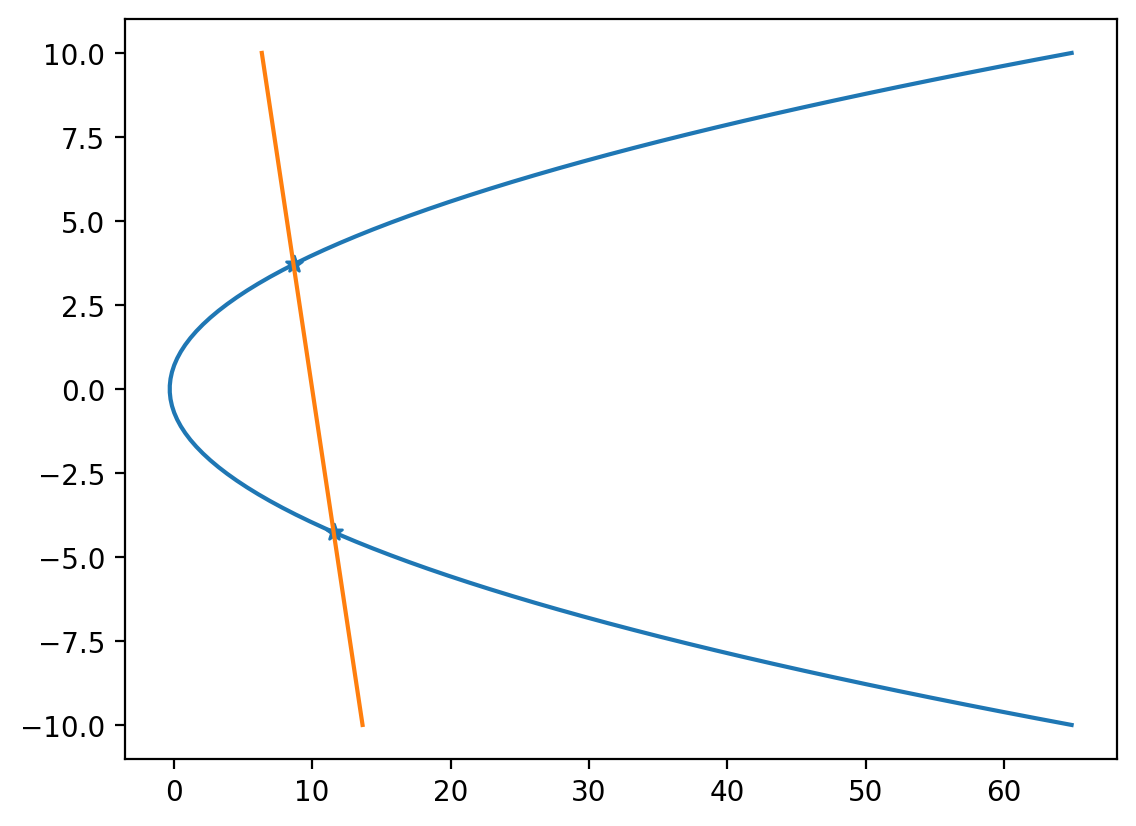

In [31]:
plt.plot(z[45,:], x)
plt.plot(z0 - a*x, x)

# plt.scatter([z_inter], [x_inter])
plt.scatter([z_inter[45], z_inter_n[45]], [x_inter[45], x_inter_n[45]], marker = "*")

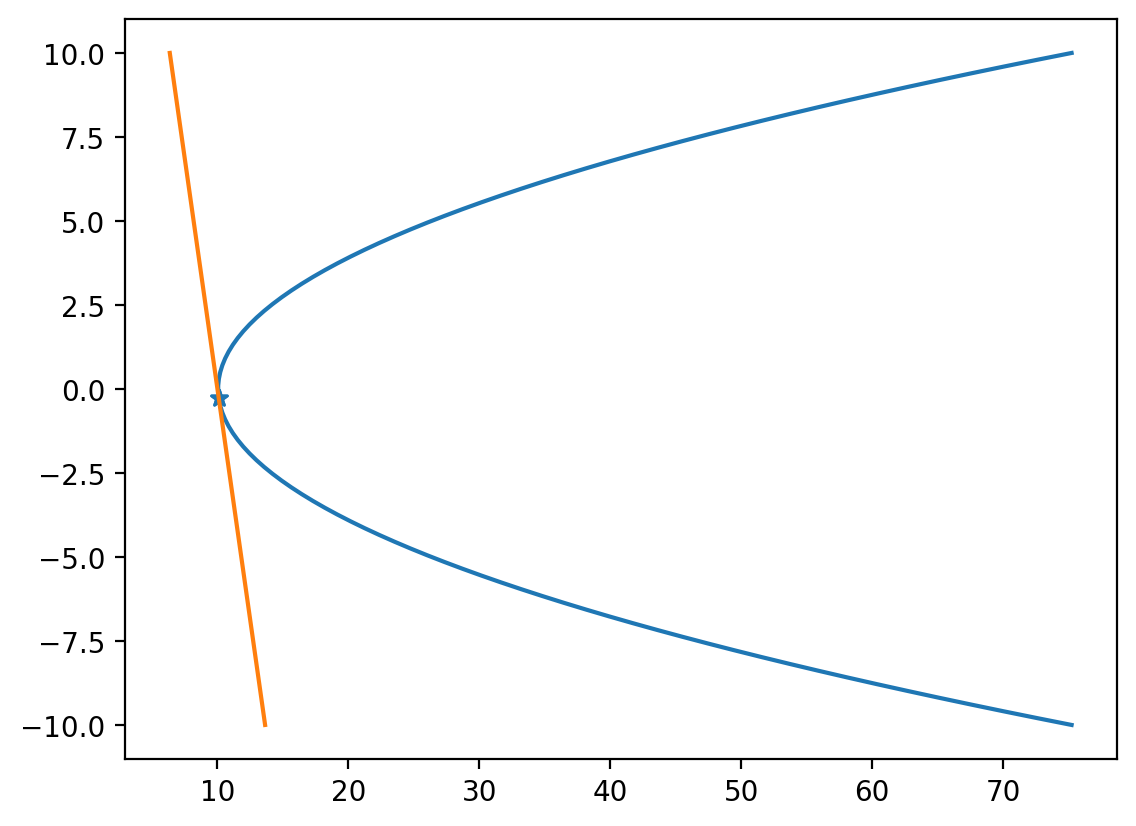

In [32]:
plt.plot(z[99,:], x)
plt.plot(z0 - a*x, x)

# plt.scatter([z_inter], [x_inter])
plt.scatter([z_inter[99], z_inter_n[99]], [x_inter[99], x_inter_n[99]], marker = "*")

In [33]:
phis = np.arctan(y / x_inter)
phis_n = np.arctan(y / x_inter_n)

(-4.680416871860335, 4.122015760948369, -4.401221757068824, 4.401221757068824)

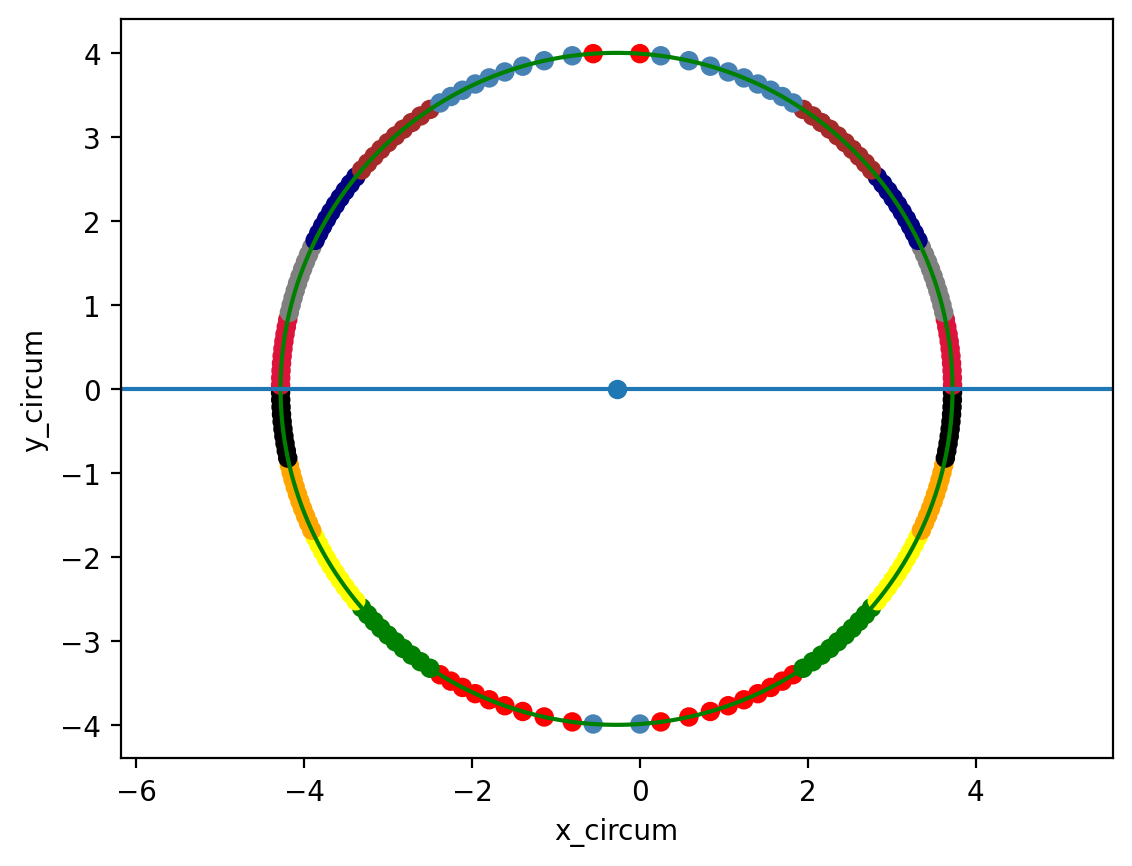

In [34]:
angle = np.linspace(0, 2 * np.pi, 1000)
plt.plot(r_le * np.cos(angle) - a * ct, r_le * np.sin(angle), c = "green")
colors = np.repeat(np.array(["red", "green", "yellow","orange", "black", "crimson", "gray", "navy", "brown", "steelblue"]), 10)

# for aa in range(len(phis)):
plt.scatter(r_le * np.cos(phis) - a * ct, r_le * np.sin(phis), c = colors)
# plt.scatter(r_le * np.cos(phis_n) - a * ct, r_le * np.sin(phis_n), c = color)

plt.scatter(r_le * np.cos(-phis + np.pi) - a * ct, r_le * np.sin(-phis + np.pi ), c = colors)
# plt.scatter(r_le * np.cos(-phis_n + np.pi) - a * ct, r_le * np.sin(-phis_n + np.pi ), c = color)


plt.axhline(0)
plt.scatter(-a * ct, 0)

plt.xlabel("x_circum")
plt.ylabel("y_circum")

plt.axis('equal')

In [35]:
n

1.9482266706875965e+54

# Data cube but with depende on delta

In [153]:
def rude_function_delta_dependence(delta, alpha, z0, n_h = n):
  """
    z0: in pc
    delta: in deg
    alpha: in deg
  """

  a = np.tan(np.deg2rad(alpha))
  z0_test = z0 #  in pc
  z0_testly = z0_test * pctoly
  ct = 280 * dtoy
  r_le = np.sqrt(2 * z0_testly * ct + (ct)**2 * (1 + a**2) )
  r_le2 = r_le**2

  x = np.linspace(-10, 10, 1000)

  y_inv = ( (2 * ct * x) - ((x ** 2 - (ct)**2 ) * np.tan(np.deg2rad(delta)) )) / (np.tan(np.deg2rad(delta)))

  x_inter_inv = np.sqrt(r_le2 - y_inv**2) - a * ct
  x_inter_inv_n = -1*np.sqrt(r_le2 - y_inv**2) - a * ct

  # x_inter = np.concatenate((x_inter_inv, x_inter_inv_n))
  x_inter = x_inter_inv.copy()

  x_inter_nan_values = x_inter[~np.isnan(x_inter)]

  # z_inter = z0_testly - a * x_inter_inv
  # z_inter_n = z0_testly - a * x_inter_inv_n
  z_inter_non = z0_testly - a * x_inter_nan_values

  np.random.seed(52+int(delta))
  grid = np.random.uniform(0, 1, (len(x_inter_nan_values), len(z_inter_non)))
  data_cube = np.zeros((len(x_inter_nan_values), len(z_inter_non), 3))

  for i in range(len(x_inter_nan_values)):
      for j in range(len(z_inter_non)):
        if i == j:
          data_cube[i, i, 0] = x_inter_nan_values[i]
          data_cube[i, i, 1] = z_inter_non[i]
          # print(grid[i,i])
          # print(data_cube[i,i,2])
          # print(n)
          data_cube[i, i, 2] = grid[i, i] * n_h
        else:
          data_cube[i, j, 0] = x_inter_nan_values[i]
          data_cube[i, j, 1] = z_inter_non[j]
          data_cube[i, j, 2] = 0

  # angle = np.linspace(0, 2 * np.pi, 1000)
  r = z_inter_non + ct

  # -- rho = x^2 + y^2 = r_le
  rhodrho  = (dz0 * ct) + (z_inter_non * c * dt0) + ct * dt0 * (1 + a**2)


  surface = np.zeros(len(r))
  for ff in range(len(x_inter_nan_values)):
      surface[ff] = Ir * data_cube[ff, ff, 2] * dz0 / ( 4 * np.pi * r[ff] * rhodrho[ff] )


  phis = np.arctan(y_inv[~np.isnan(x_inter_inv)] /x_inter_inv[~np.isnan(x_inter_inv)])
  # print("phis", len(phis))
  phis_n = np.arctan(y_inv[~np.isnan(x_inter_inv_n)] /x_inter_inv_n[~np.isnan(x_inter_inv_n)])

  # print("x non nan", len(x_inter_nan_values))

  half_obs_thickness = np.sqrt( (ct / r_le) ** 2 * dz0 ** 2 + ( (r_le * c / 2 * ct) + ( c * ct / 2 * r_le )) ** 2 * dt0  ** 2 ) / 2
  # -- include the thickness in xy plane
  r_le_out= r_le + half_obs_thickness
  # -- in arcseconds 5kpc = 16308 ly
  # -- degree to arcseconds
  r_le_out = np.arctan(r_le_out / d) * (180 / np.pi) * 3600
  r_le_in = r_le - half_obs_thickness
  r_le_in = np.arctan(r_le_in / d) * (180 / np.pi) * 3600

  act = np.arctan(a * ct / d) * (180 / np.pi) * 3600

  radii_p = [r_le_out, r_le_in]
  xs_p = np.outer(radii_p, np.cos(phis)) - act
  ys_p = np.outer(radii_p, np.sin(phis))
  # xs_p[1,:] = xs_p[1,::-1]
  # ys_p[1,:] = ys_p[1,::-1]

  # xs_n = np.outer(radii_p, np.cos(phis_n)) - act
  # ys_n = np.outer(radii_p, np.sin(phis_n))
  # xs_n[1,:] = xs_n[1,::-1]
  # ys_n[1,:] = ys_n[1,::-1]

  # new_xs = np.concatenate((xs_p, xs_n), axis=1).reshape(1,2,len(r))
  # new_ys = np.concatenate((ys_p, ys_n), axis=1).reshape(1,2,len(r))

  new_xs = xs_p.reshape(1,2,len(phis))
  new_ys = ys_p.reshape(1,2,len(phis))


  # ----- other half
  xs_p_h = np.outer(radii_p, np.cos(-phis + np.pi)) - act
  ys_p_h = np.outer(radii_p, np.sin(-phis + np.pi))
  # xs_p[1,:] = xs_p[1,::-1]
  # ys_p[1,:] = ys_p[1,::-1]

  # xs_n_h = np.outer(radii_p, np.cos(-phis_n + np.pi)) - act
  # ys_n_h = np.outer(radii_p, np.sin(-phis_n + np.pi))
  # xs_n[1,:] = xs_n[1,::-1]
  # ys_n[1,:] = ys_n[1,::-1]

  new_xs_h = xs_p_h.reshape(1,2,len(phis))
  new_ys_h = ys_p_h.reshape(1,2,len(phis))

  return new_xs, new_ys, new_xs_h, new_ys_h, surface, act, r_le, a


In [154]:
delta_1 = 10
new_xs_55, new_ys_55, new_xs_h_55, new_ys_h_55, surface_55, act1, r_le_1, a_1 = rude_function_delta_dependence(delta = delta_1, alpha = 76, z0 = 0.3)
delta_2 = 100
new_xs_20, new_ys_20, new_xs_h_20, new_ys_h_20, surface_20, act2, r_le_2, a_2 = rude_function_delta_dependence(delta = delta_2, alpha = 50, z0 = 0.3)


<ipython-input-153-002c031a512c>:19: RuntimeWarning: invalid value encountered in sqrt
  x_inter_inv = np.sqrt(r_le2 - y_inv**2) - a * ct
<ipython-input-153-002c031a512c>:20: RuntimeWarning: invalid value encountered in sqrt
  x_inter_inv_n = -1*np.sqrt(r_le2 - y_inv**2) - a * ct


In [155]:
new_xs_20.shape, new_xs_55.shape

((1, 2, 152), (1, 2, 77))

In [156]:
new_xs_55[0,0,2], new_xs_20[0,0,2]

(-19.49666863104406, -8.096581927067096)

In [157]:
surface = np.concatenate((surface_55, surface_20))
new_xs = np.concatenate((new_xs_55, new_xs_20), axis=2)
new_ys = np.concatenate((new_ys_55, new_ys_20), axis=2)

new_xs_h = np.concatenate((new_xs_h_55, new_xs_h_20), axis=2)
new_ys_h = np.concatenate((new_ys_h_55, new_ys_h_20), axis=2)

In [158]:
surface.shape, new_xs.shape

((229,), (1, 2, 229))

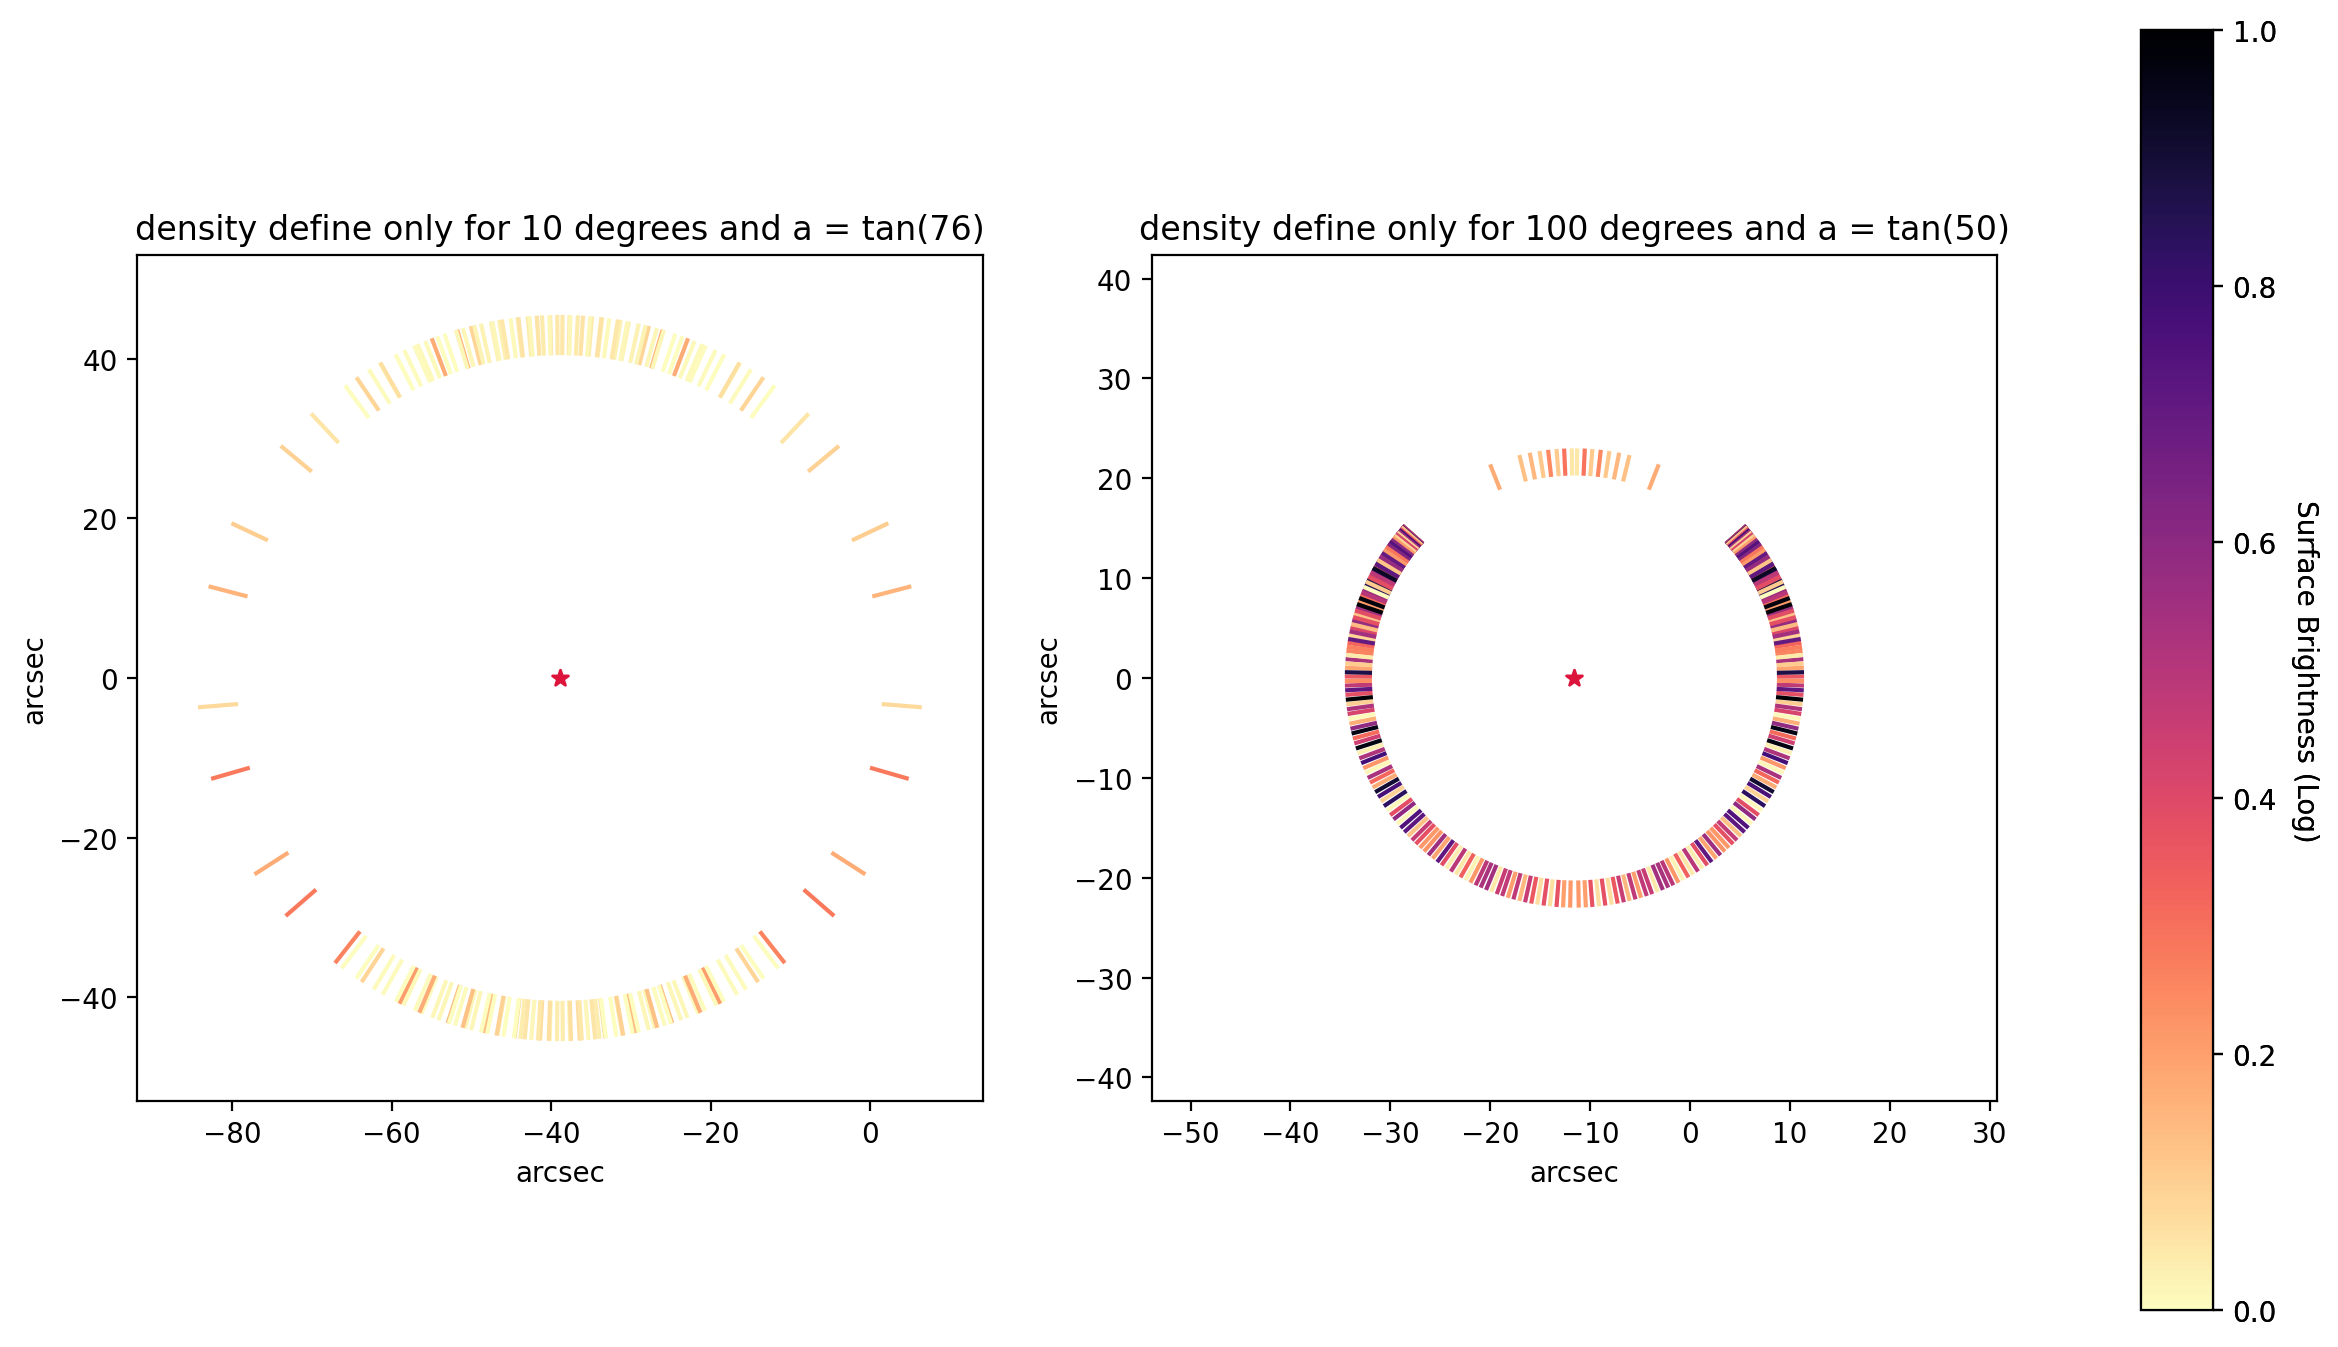

In [159]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))


surface_300_norm = ( surface.copy() - np.nanmin(surface.copy())  ) / (np.nanmax(surface.copy()) - np.nanmin(surface.copy()))
cmap = matplotlib.colormaps.get_cmap('magma_r')
normalize = matplotlib.colors.Normalize(vmin=np.nanmin(surface_300_norm), vmax=np.nanmax(surface_300_norm))



ax1.set_title("density define only for %s degrees and a = tan(%s)"%(delta_1, int(np.rad2deg(np.arctan(a_1)))))

limit_max = np.max([r_le_1, r_le_2])
# limit_min = np.min([limit_min_1, limit_min_h])


r_le_arc = np.arctan(limit_max / d) * (180 / np.pi) * 3600
ax1.set_xlim(-act1 - r_le_arc - 10, -act1 + r_le_arc + 10)
ax1.set_ylim(-r_le_arc - 10, r_le_arc + 10)

for k in range(len(surface[:new_xs_55.shape[2]])):
  ax1.plot(new_xs[0, :, k], new_ys[0, :, k], color=cmap(normalize(surface_300_norm[k])))#, label="%s"%(z/pctoly))
  ax1.plot(new_xs_h[0, :, k], new_ys_h[0, :, k], color=cmap(normalize(surface_300_norm[k])))#, label="%s"%(z/pctoly))
  # print(surface[k], cmap(normalize(surface[k])))
ax1.scatter(- act1, 0, marker = "*", color = "crimson")


cbax1 = fig.add_axes([0.96, 0.1, 0.03, 0.80])

ax1.set_xlabel("arcsec")
ax1.set_ylabel("arcsec")
ax1.set_box_aspect(1)

cb1 = matplotlib.colorbar.ColorbarBase(cbax1, cmap=cmap, norm=normalize, orientation='vertical')
cb1.set_label("Surface Brightness (Log)", rotation=270, labelpad=15)

def label_cbrt(x,pos):
    return "{:.1f}".format(x)

cb1.formatter = matplotlib.ticker.FuncFormatter(label_cbrt)
# cb.update_ticks()
# # plt.tight_layout()
# # plt.savefig("figure2.png", dpi = 700, bbox_inches='tight')
# # print(set(legend_dust))
# plt.show()


ax2.set_title("density define only for %s degrees and a = tan(%s)"%(delta_2, int(np.rad2deg(np.arctan(a_2)))))
# cmap = matplotlib.colormaps.get_cmap('magma_r')
# normalize = matplotlib.colors.Normalize(vmin=np.nanmin(surface_300_norm), vmax=np.nanmax(surface_300_norm))
limit_max = np.max([max(np.ravel(new_xs)), max(np.ravel(new_ys))])
limit_min = np.min([min(np.ravel(new_xs)), min(np.ravel(new_ys))])

r_le_arc = np.arctan(r_le / d) * (180 / np.pi) * 3600
ax2.set_xlim(-act2 - r_le_arc - 10, -act2 + r_le_arc + 10)
ax2.set_ylim(-r_le_arc - 10, r_le_arc + 10)

for k in range(new_xs_55.shape[2], len(surface)-1):
  ax2.plot(new_xs[0, :, k], new_ys[0, :, k], color=cmap(normalize(surface_300_norm[k])))#, label="%s"%(z/pctoly))
  ax2.plot(new_xs_h[0, :, k], new_ys_h[0, :, k], color=cmap(normalize(surface_300_norm[k])))#, label="%s"%(z/pctoly))
ax2.scatter(- act2, 0, marker = "*", color = "crimson")


cbax2 = fig.add_axes([0.96, 0.1, 0.03, 0.80])

ax2.set_xlabel("arcsec")
ax2.set_ylabel("arcsec")
ax2.set_box_aspect(1)

cb2 = matplotlib.colorbar.ColorbarBase(cbax2, cmap=cmap, norm=normalize, orientation='vertical')
cb2.set_label("Surface Brightness (Log)", rotation=270, labelpad=15)

def label_cbrt(x,pos):
    return "{:.1f}".format(x)

cb2.formatter = matplotlib.ticker.FuncFormatter(label_cbrt)
# # cb.update_ticks()
# # # plt.tight_layout()
# # # plt.savefig("figure2.png", dpi = 700, bbox_inches='tight')
# # # print(set(legend_dust))
# plt.show()


In [160]:
delta_1 = 10
new_xs_55, new_ys_55, new_xs_h_55, new_ys_h_55, surface_55, act, r_le_1, a_1 = rude_function_delta_dependence(delta = delta_1, alpha = 76, z0 = 0.3)
delta_2 = 100
new_xs_20, new_ys_20, new_xs_h_20, new_ys_h_20, surface_20, act, r_le_2, a_2 = rude_function_delta_dependence(delta = delta_2, alpha = 50, z0 = 0.3)

surface = np.concatenate((surface_55, surface_20))
new_xs = np.concatenate((new_xs_55, new_xs_20), axis=2)
new_ys = np.concatenate((new_ys_55, new_ys_20), axis=2)

new_xs_h = np.concatenate((new_xs_h_55, new_xs_h_20), axis=2)
new_ys_h = np.concatenate((new_ys_h_55, new_ys_h_20), axis=2)

<ipython-input-153-002c031a512c>:19: RuntimeWarning: invalid value encountered in sqrt
  x_inter_inv = np.sqrt(r_le2 - y_inv**2) - a * ct
<ipython-input-153-002c031a512c>:20: RuntimeWarning: invalid value encountered in sqrt
  x_inter_inv_n = -1*np.sqrt(r_le2 - y_inv**2) - a * ct


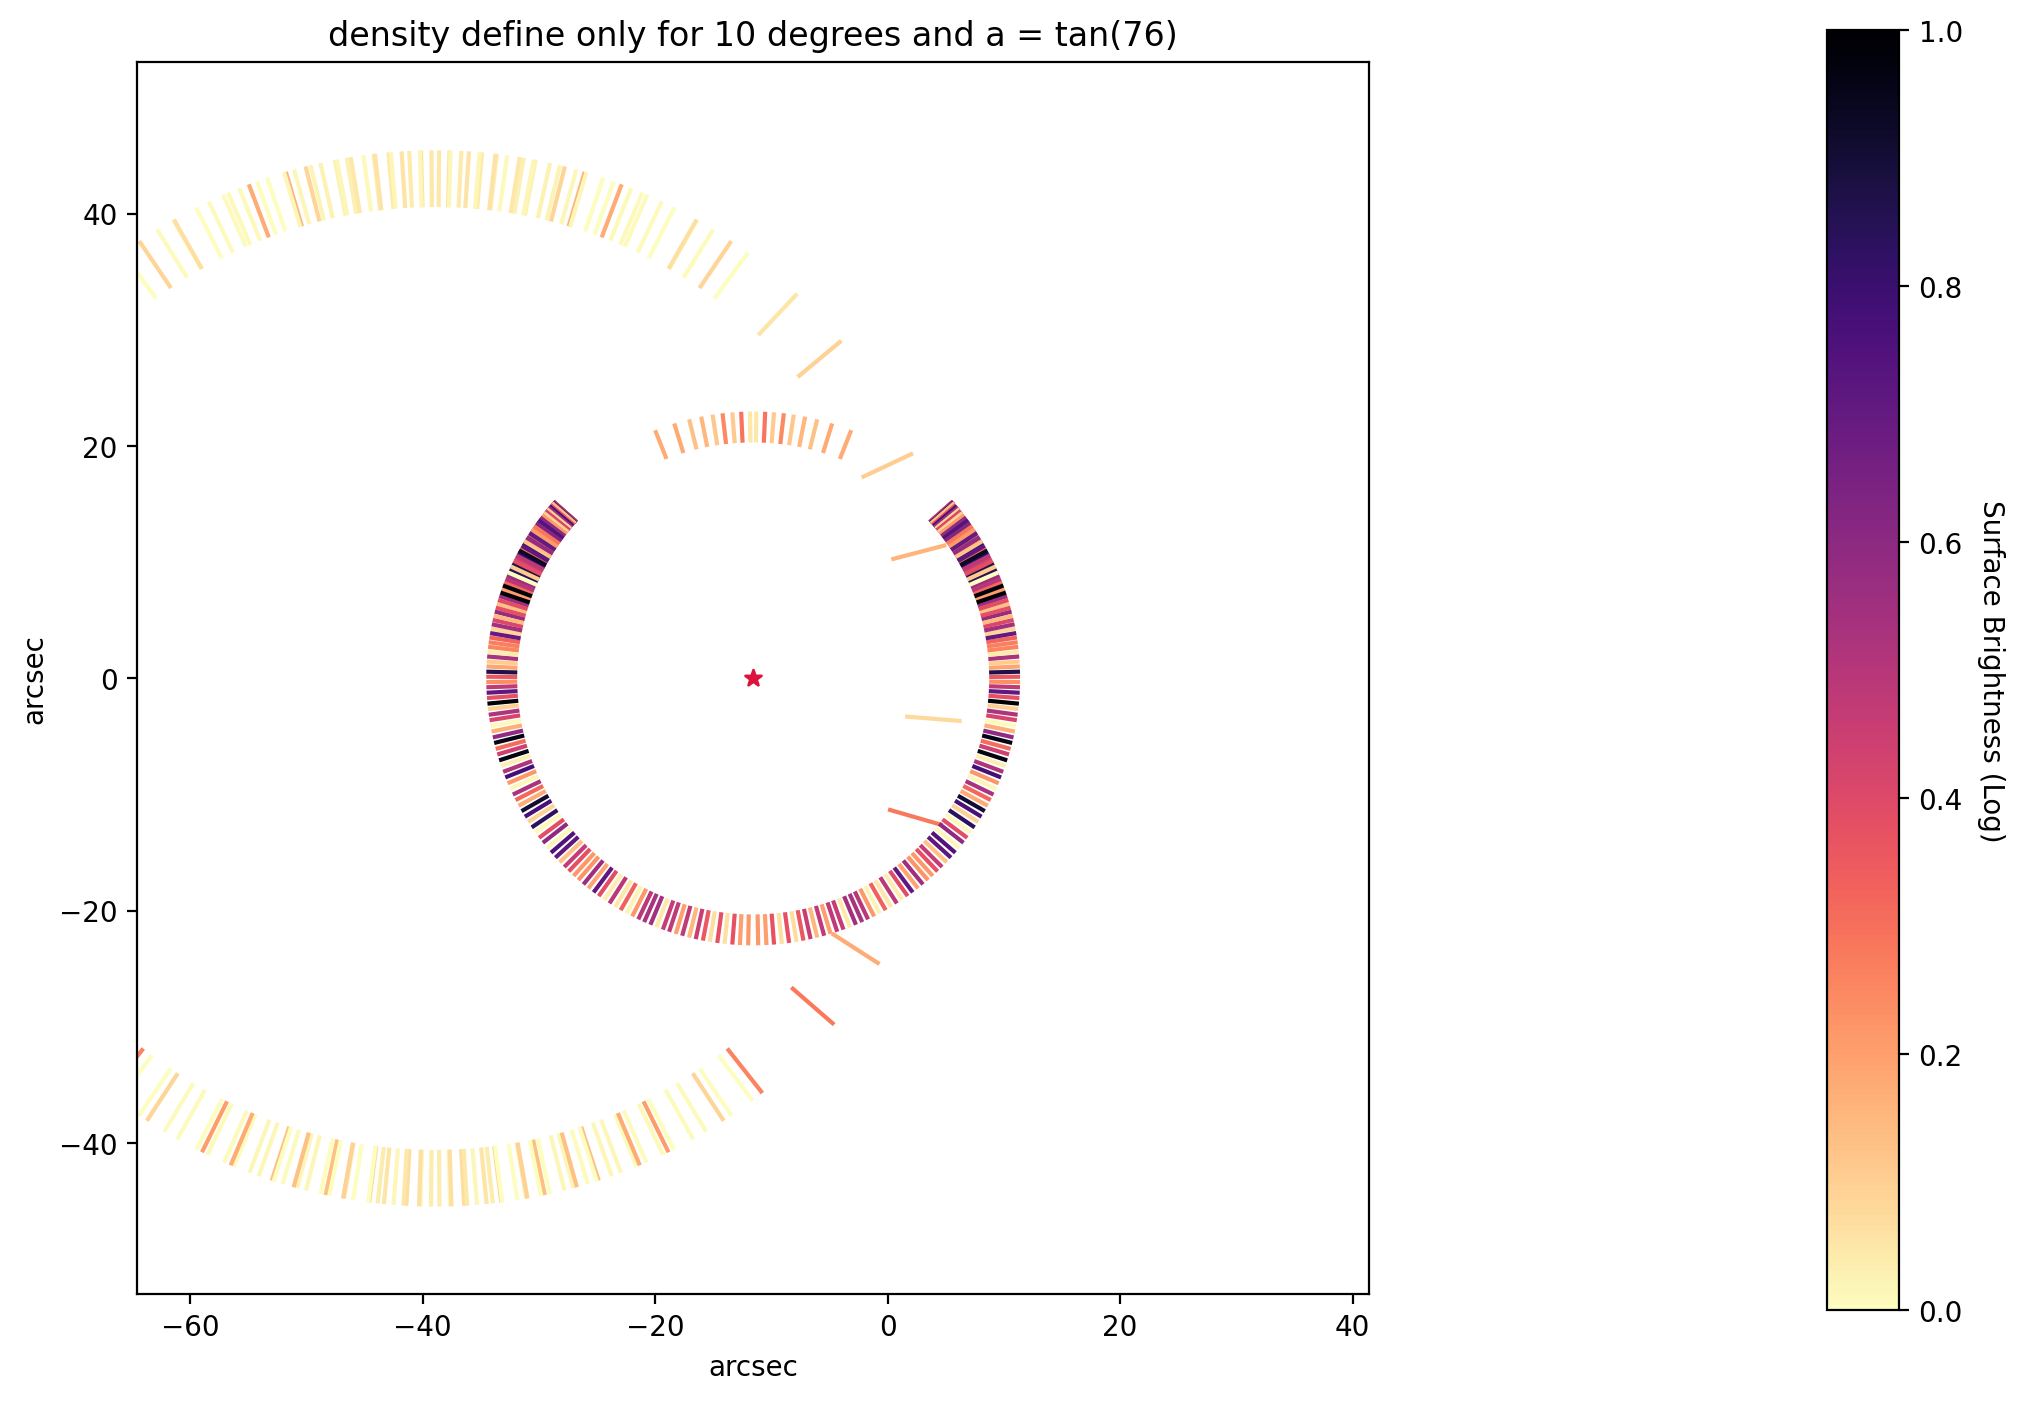

In [161]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))


surface_300_norm = ( surface.copy() - np.nanmin(surface.copy())  ) / (np.nanmax(surface.copy()) - np.nanmin(surface.copy()))
cmap = matplotlib.colormaps.get_cmap('magma_r')
normalize = matplotlib.colors.Normalize(vmin=np.nanmin(surface_300_norm), vmax=np.nanmax(surface_300_norm))



ax.set_title("density define only for %s degrees and a = tan(%s)"%(delta_1, int(np.rad2deg(np.arctan(a_1)))))

limit_max = np.max([r_le_1, r_le_2])
# limit_min = np.min([limit_min_1, limit_min_h])


r_le_arc = np.arctan(limit_max / d) * (180 / np.pi) * 3600
ax.set_xlim(-act - r_le_arc - 10, -act + r_le_arc + 10)
ax.set_ylim(-r_le_arc - 10, r_le_arc + 10)

for k in range(len(surface)):
  ax.plot(new_xs[0, :, k], new_ys[0, :, k], color=cmap(normalize(surface_300_norm[k])))#, label="%s"%(z/pctoly))
  ax.plot(new_xs_h[0, :, k], new_ys_h[0, :, k], color=cmap(normalize(surface_300_norm[k])))#, label="%s"%(z/pctoly))
  # print(surface[k], cmap(normalize(surface[k])))
ax.scatter(- act, 0, marker = "*", color = "crimson")


cbax = fig.add_axes([0.96, 0.1, 0.03, 0.80])

ax.set_xlabel("arcsec")
ax.set_ylabel("arcsec")
ax.set_box_aspect(1)

cb1 = matplotlib.colorbar.ColorbarBase(cbax, cmap=cmap, norm=normalize, orientation='vertical')
cb1.set_label("Surface Brightness (Log)", rotation=270, labelpad=15)

def label_cbrt(x,pos):
    return "{:.1f}".format(x)

cb1.formatter = matplotlib.ticker.FuncFormatter(label_cbrt)
# cb.update_ticks()
# # plt.tight_layout()
# # plt.savefig("figure2.png", dpi = 700, bbox_inches='tight')
# # print(set(legend_dust))
# plt.show()

In [162]:
new_xs_list = []
new_ys_list = []

new_xs_h_list = []
new_ys_h_list = []

surface_list = []

deltass = np.linspace(0, 360, 100)
for deltas in deltass:
  new_xs, new_ys, new_xs_h, new_ys_h, surface, act, r_le, a = rude_function_delta_dependence(delta = deltas, alpha = 330, z0 = 0.3)
  new_xs_list.append(new_xs)
  new_ys_list.append(new_ys)
  new_xs_h_list.append(new_xs_h)
  new_ys_h_list.append(new_ys_h)
  surface_list.append(surface)

<ipython-input-153-002c031a512c>:17: RuntimeWarning: divide by zero encountered in true_divide
  y_inv = ( (2 * ct * x) - ((x ** 2 - (ct)**2 ) * np.tan(np.deg2rad(delta)) )) / (np.tan(np.deg2rad(delta)))
<ipython-input-153-002c031a512c>:19: RuntimeWarning: invalid value encountered in sqrt
  x_inter_inv = np.sqrt(r_le2 - y_inv**2) - a * ct
<ipython-input-153-002c031a512c>:20: RuntimeWarning: invalid value encountered in sqrt
  x_inter_inv_n = -1*np.sqrt(r_le2 - y_inv**2) - a * ct


In [163]:
new_xs = np.concatenate(new_xs_list, axis = 2)
new_ys = np.concatenate(new_ys_list, axis = 2)

new_xs_h = np.concatenate(new_xs_h_list, axis = 2)
new_ys_h = np.concatenate(new_ys_h_list, axis = 2)

surface = np.concatenate(surface_list)

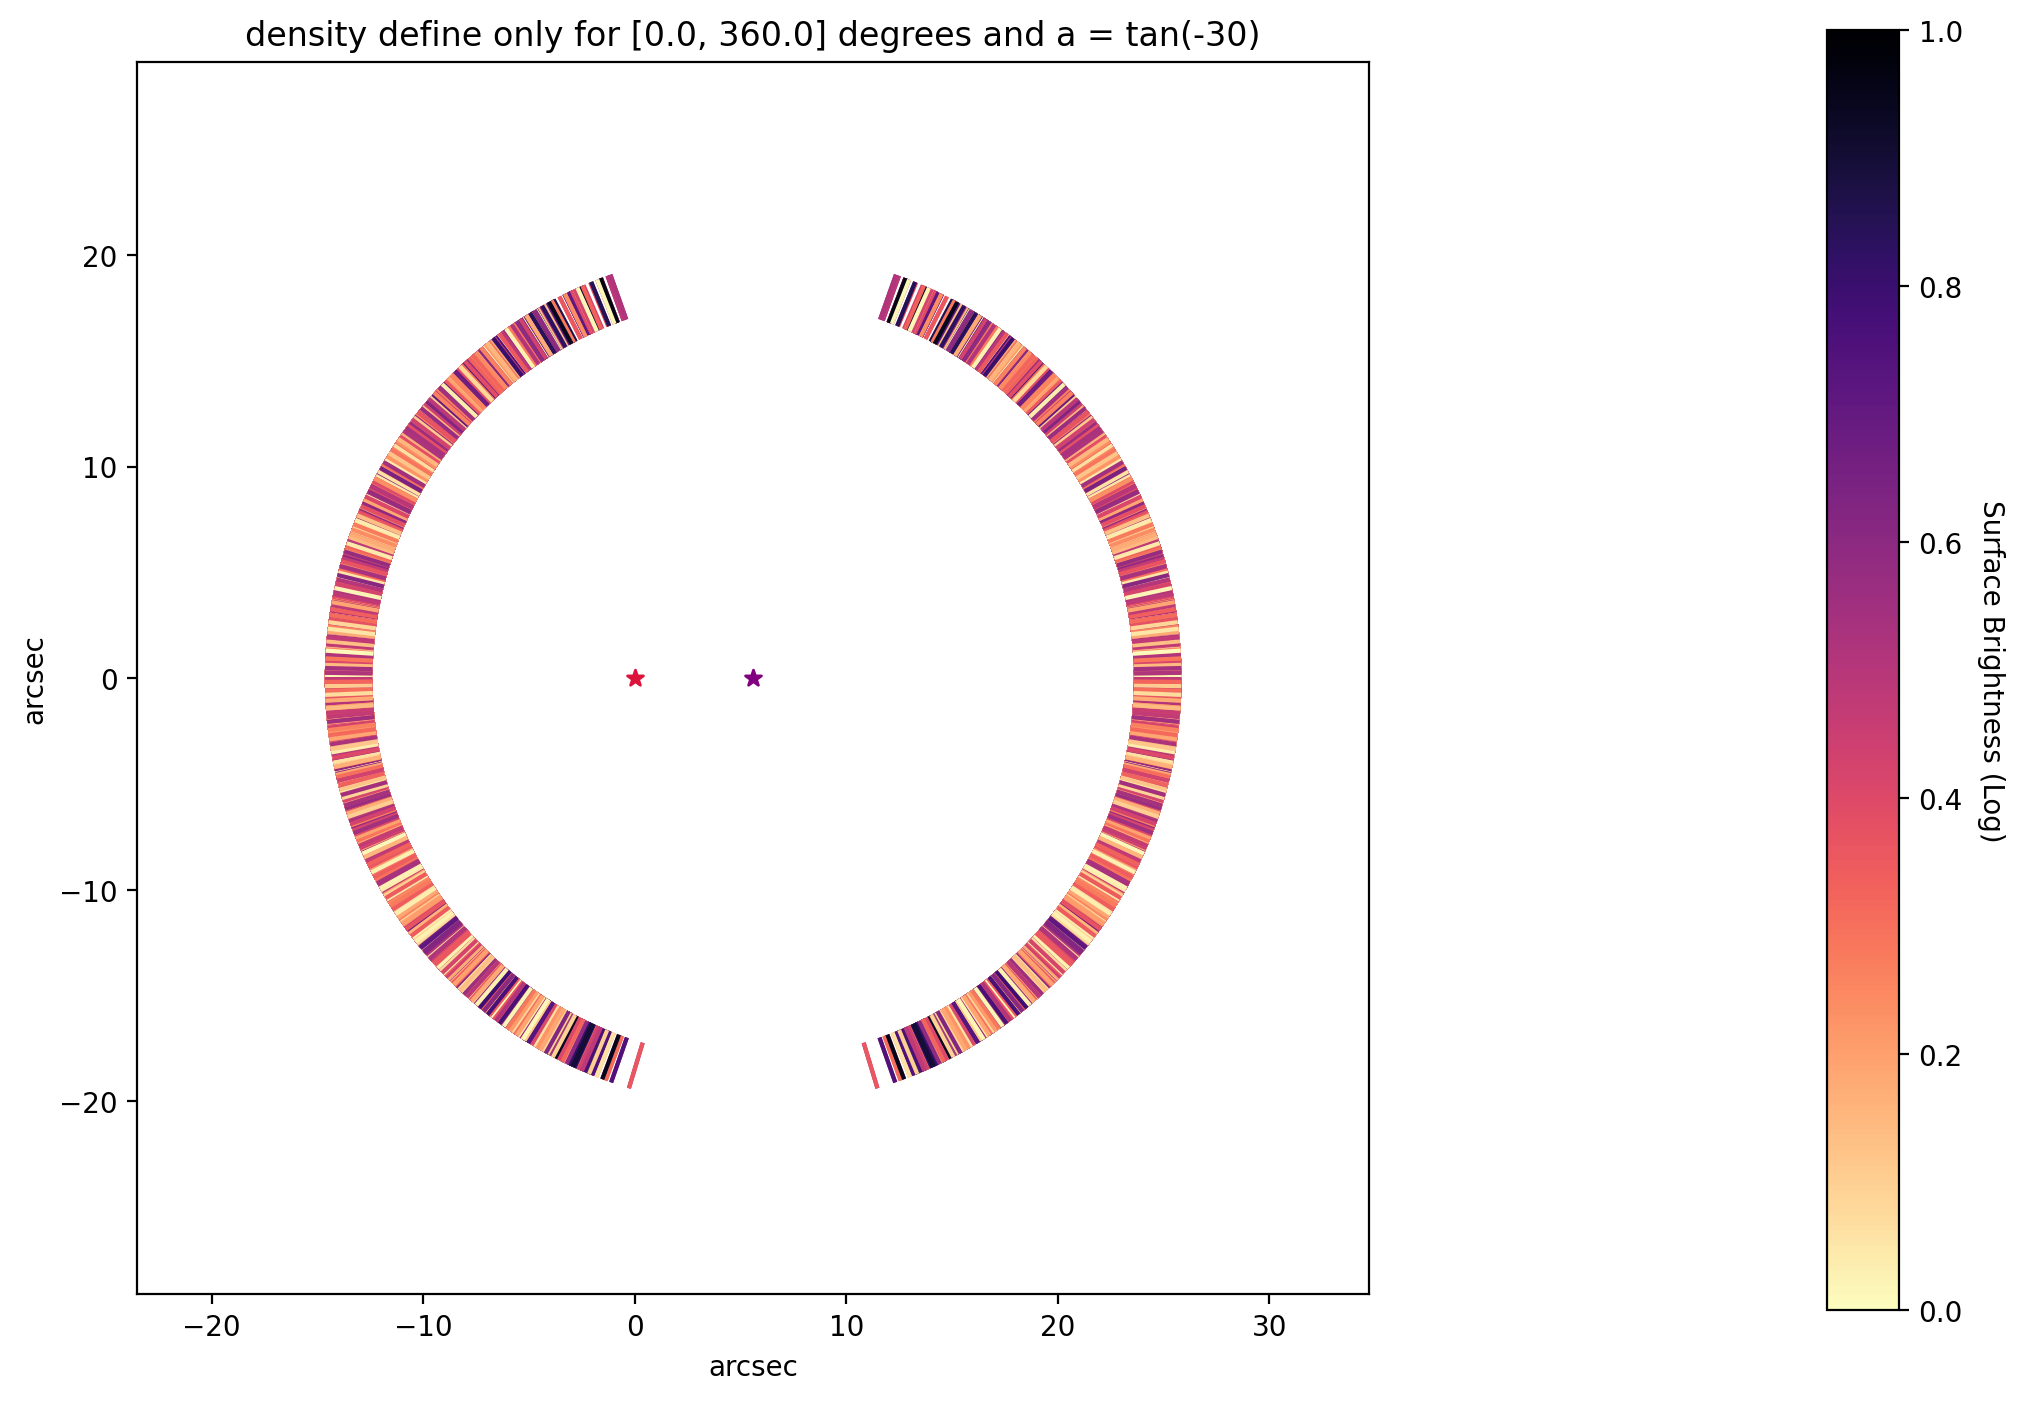

In [164]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))


surface_300_norm = ( surface.copy() - np.nanmin(surface.copy())  ) / (np.nanmax(surface.copy()) - np.nanmin(surface.copy()))
cmap = matplotlib.colormaps.get_cmap('magma_r')
normalize = matplotlib.colors.Normalize(vmin=np.nanmin(surface_300_norm), vmax=np.nanmax(surface_300_norm))



ax.set_title("density define only for %s degrees and a = tan(%s)"%([deltass.min(), deltass.max()], int(np.rad2deg(np.arctan(a)))))

r_le_arc = np.arctan(r_le / d) * (180 / np.pi) * 3600
ax.set_xlim(-act - r_le_arc - 10, -act + r_le_arc + 10)
ax.set_ylim(-r_le_arc - 10, r_le_arc + 10)

for k in range(len(surface)):
  ax.plot(new_xs[0, :, k], new_ys[0, :, k], color=cmap(normalize(surface_300_norm[k])))#, label="%s"%(z/pctoly))
  ax.plot(new_xs_h[0, :, k], new_ys_h[0, :, k], color=cmap(normalize(surface_300_norm[k])))#, label="%s"%(z/pctoly))
  # print(surface[k], cmap(normalize(surface[k])))
ax.scatter(- act, 0, marker = "*", color = "purple")
ax.scatter(0, 0, marker = "*", color = "crimson")



cbax = fig.add_axes([0.96, 0.1, 0.03, 0.80])

ax.set_xlabel("arcsec")
ax.set_ylabel("arcsec")
ax.set_box_aspect(1)

cb1 = matplotlib.colorbar.ColorbarBase(cbax, cmap=cmap, norm=normalize, orientation='vertical')
cb1.set_label("Surface Brightness (Log)", rotation=270, labelpad=15)

def label_cbrt(x,pos):
    return "{:.1f}".format(x)

cb1.formatter = matplotlib.ticker.FuncFormatter(label_cbrt)
# cb.update_ticks()
# # plt.tight_layout()
# # plt.savefig("figure2.png", dpi = 700, bbox_inches='tight')
# # print(set(legend_dust))
# plt.show()

In [169]:
new_xs_list = []
new_ys_list = []

new_xs_h_list = []
new_ys_h_list = []

surface_list = []

deltass = np.linspace(0, 360, 100)
for deltas in deltass:
  new_xs, new_ys, new_xs_h, new_ys_h, surface, act, r_le, a = rude_function_delta_dependence(delta = deltas, alpha = 45, z0 = 0.01)
  new_xs_list.append(new_xs)
  new_ys_list.append(new_ys)
  new_xs_h_list.append(new_xs_h)
  new_ys_h_list.append(new_ys_h)
  surface_list.append(surface)


new_xs = np.concatenate(new_xs_list, axis = 2)
new_ys = np.concatenate(new_ys_list, axis = 2)

new_xs_h = np.concatenate(new_xs_h_list, axis = 2)
new_ys_h = np.concatenate(new_ys_h_list, axis = 2)

surface = np.concatenate(surface_list)

<ipython-input-153-002c031a512c>:17: RuntimeWarning: divide by zero encountered in true_divide
  y_inv = ( (2 * ct * x) - ((x ** 2 - (ct)**2 ) * np.tan(np.deg2rad(delta)) )) / (np.tan(np.deg2rad(delta)))
<ipython-input-153-002c031a512c>:19: RuntimeWarning: invalid value encountered in sqrt
  x_inter_inv = np.sqrt(r_le2 - y_inv**2) - a * ct
<ipython-input-153-002c031a512c>:20: RuntimeWarning: invalid value encountered in sqrt
  x_inter_inv_n = -1*np.sqrt(r_le2 - y_inv**2) - a * ct


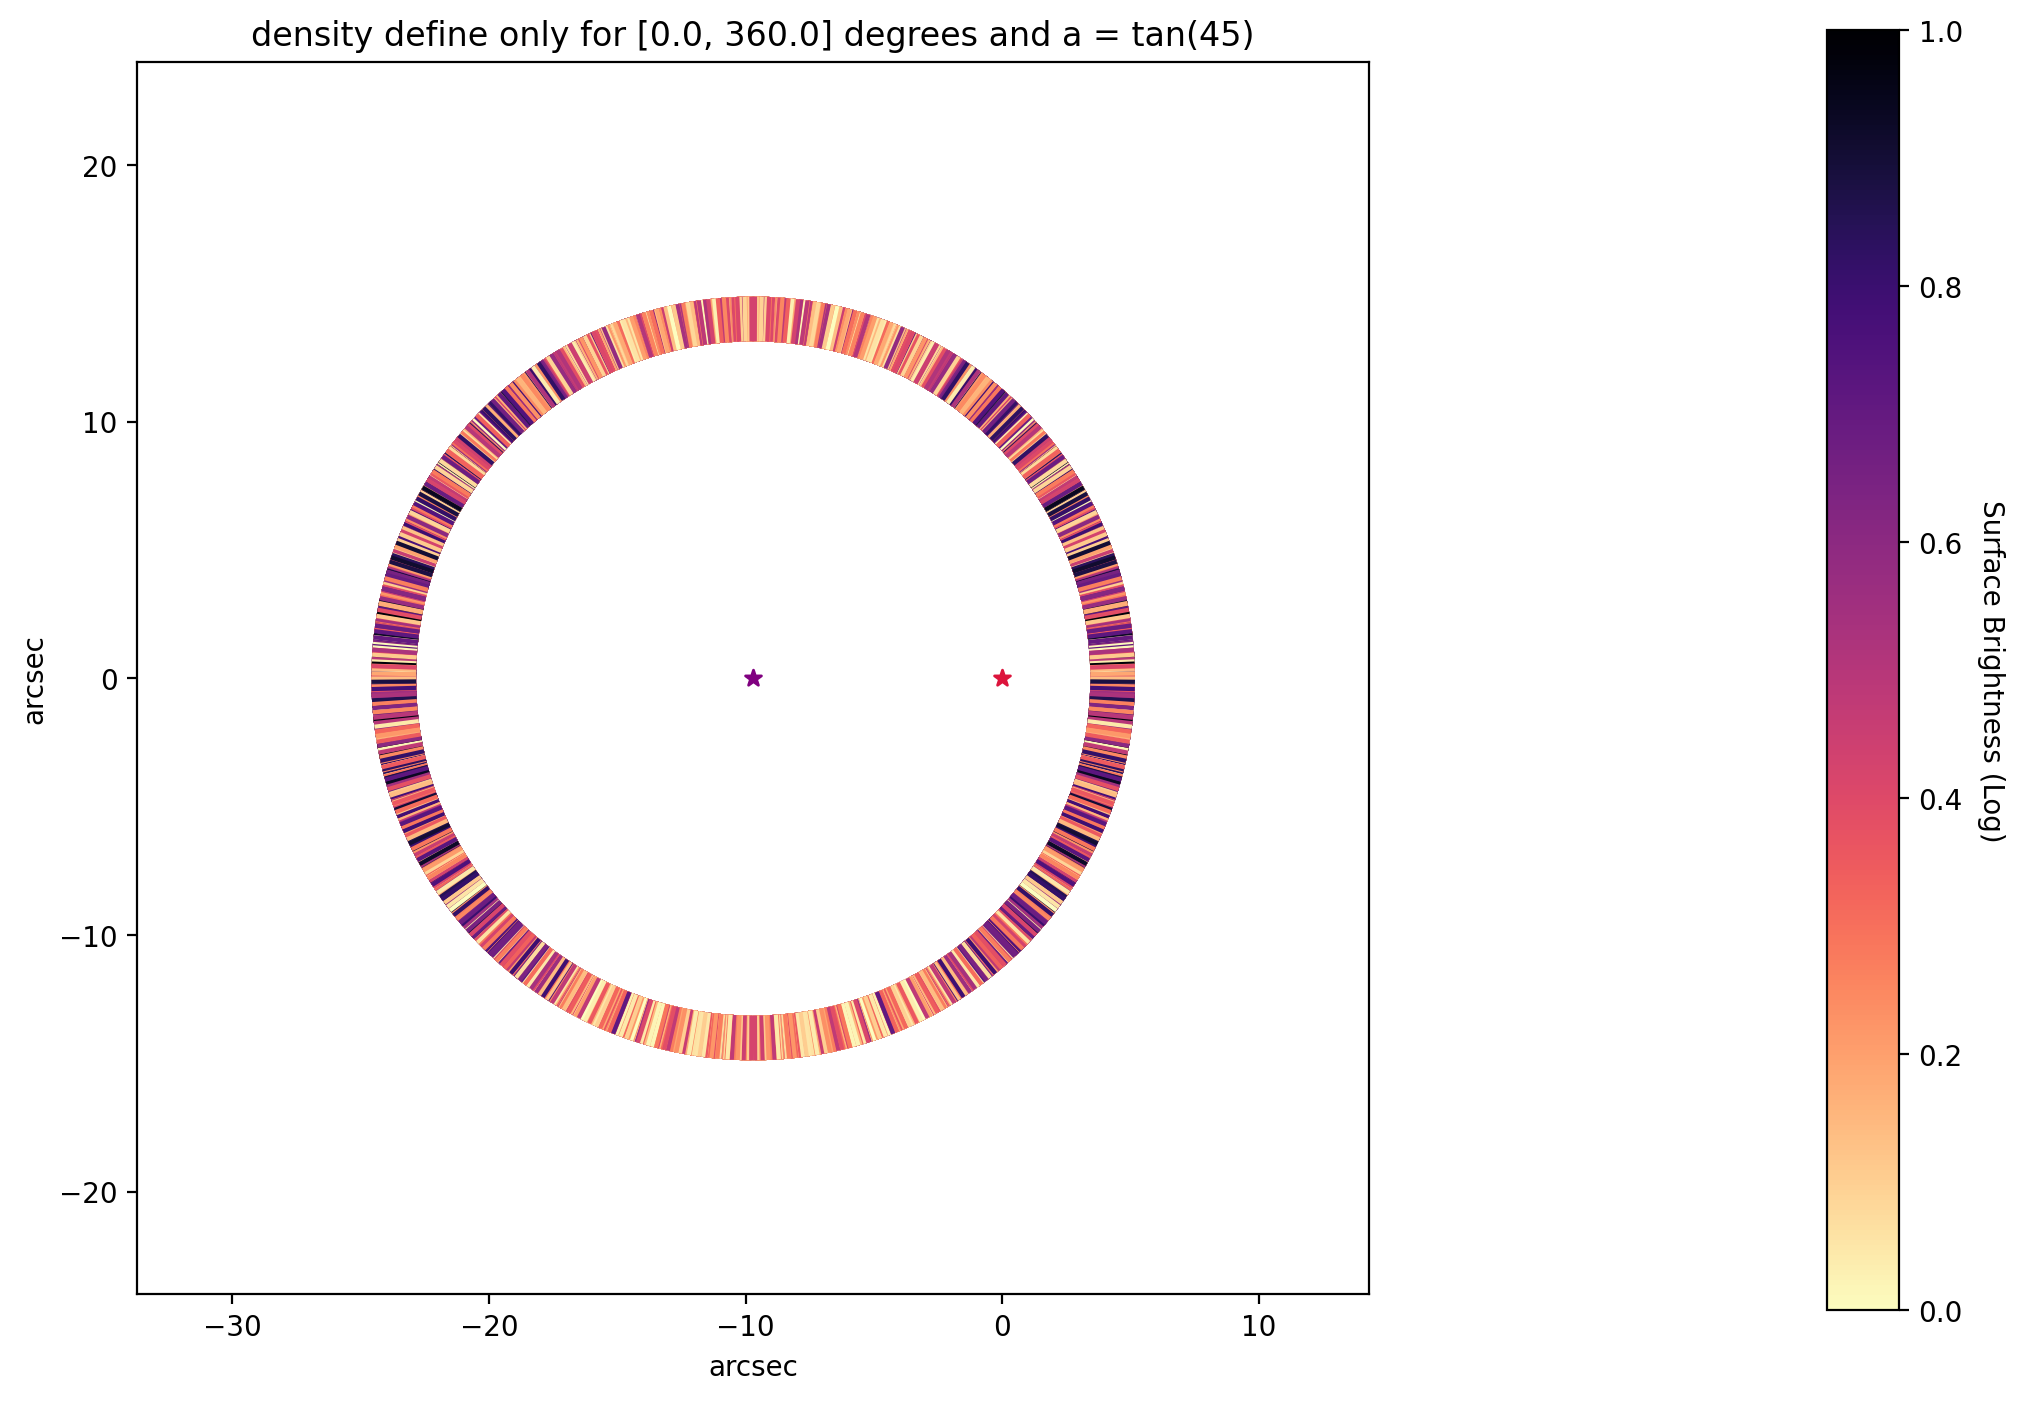

In [170]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))


surface_300_norm = ( surface.copy() - np.nanmin(surface.copy())  ) / (np.nanmax(surface.copy()) - np.nanmin(surface.copy()))
cmap = matplotlib.colormaps.get_cmap('magma_r')
normalize = matplotlib.colors.Normalize(vmin=np.nanmin(surface_300_norm), vmax=np.nanmax(surface_300_norm))



ax.set_title("density define only for %s degrees and a = tan(%s)"%([deltass.min(), deltass.max()], int(np.rad2deg(np.arctan(a)))))

r_le_arc = np.arctan(r_le / d) * (180 / np.pi) * 3600
ax.set_xlim(-act - r_le_arc - 10, -act + r_le_arc + 10)
ax.set_ylim(-r_le_arc - 10, r_le_arc + 10)

for k in range(len(surface)):
  ax.plot(new_xs[0, :, k], new_ys[0, :, k], color=cmap(normalize(surface_300_norm[k])))#, label="%s"%(z/pctoly))
  ax.plot(new_xs_h[0, :, k], new_ys_h[0, :, k], color=cmap(normalize(surface_300_norm[k])))#, label="%s"%(z/pctoly))
  # print(surface[k], cmap(normalize(surface[k])))
ax.scatter(- act, 0, marker = "*", color = "purple")
ax.scatter(0, 0, marker = "*", color = "crimson")

cbax = fig.add_axes([0.96, 0.1, 0.03, 0.80])

ax.set_xlabel("arcsec")
ax.set_ylabel("arcsec")
ax.set_box_aspect(1)

cb1 = matplotlib.colorbar.ColorbarBase(cbax, cmap=cmap, norm=normalize, orientation='vertical')
cb1.set_label("Surface Brightness (Log)", rotation=270, labelpad=15)

def label_cbrt(x,pos):
    return "{:.1f}".format(x)

cb1.formatter = matplotlib.ticker.FuncFormatter(label_cbrt)
# cb.update_ticks()
# # plt.tight_layout()
# # plt.savefig("figure2.png", dpi = 700, bbox_inches='tight')
# # print(set(legend_dust))
# plt.show()

In [171]:
new_xs_list = []
new_ys_list = []

new_xs_h_list = []
new_ys_h_list = []

surface_list = []

deltass = np.linspace(0, 360, 100)
for deltas in deltass:
  new_xs, new_ys, new_xs_h, new_ys_h, surface, act, r_le, a = rude_function_delta_dependence(delta = deltas, alpha = 290, z0 = 1000)
  new_xs_list.append(new_xs)
  new_ys_list.append(new_ys)
  new_xs_h_list.append(new_xs_h)
  new_ys_h_list.append(new_ys_h)
  surface_list.append(surface)


new_xs = np.concatenate(new_xs_list, axis = 2)
new_ys = np.concatenate(new_ys_list, axis = 2)

new_xs_h = np.concatenate(new_xs_h_list, axis = 2)
new_ys_h = np.concatenate(new_ys_h_list, axis = 2)

surface = np.concatenate(surface_list)

<ipython-input-153-002c031a512c>:17: RuntimeWarning: divide by zero encountered in true_divide
  y_inv = ( (2 * ct * x) - ((x ** 2 - (ct)**2 ) * np.tan(np.deg2rad(delta)) )) / (np.tan(np.deg2rad(delta)))
<ipython-input-153-002c031a512c>:19: RuntimeWarning: invalid value encountered in sqrt
  x_inter_inv = np.sqrt(r_le2 - y_inv**2) - a * ct
<ipython-input-153-002c031a512c>:20: RuntimeWarning: invalid value encountered in sqrt
  x_inter_inv_n = -1*np.sqrt(r_le2 - y_inv**2) - a * ct


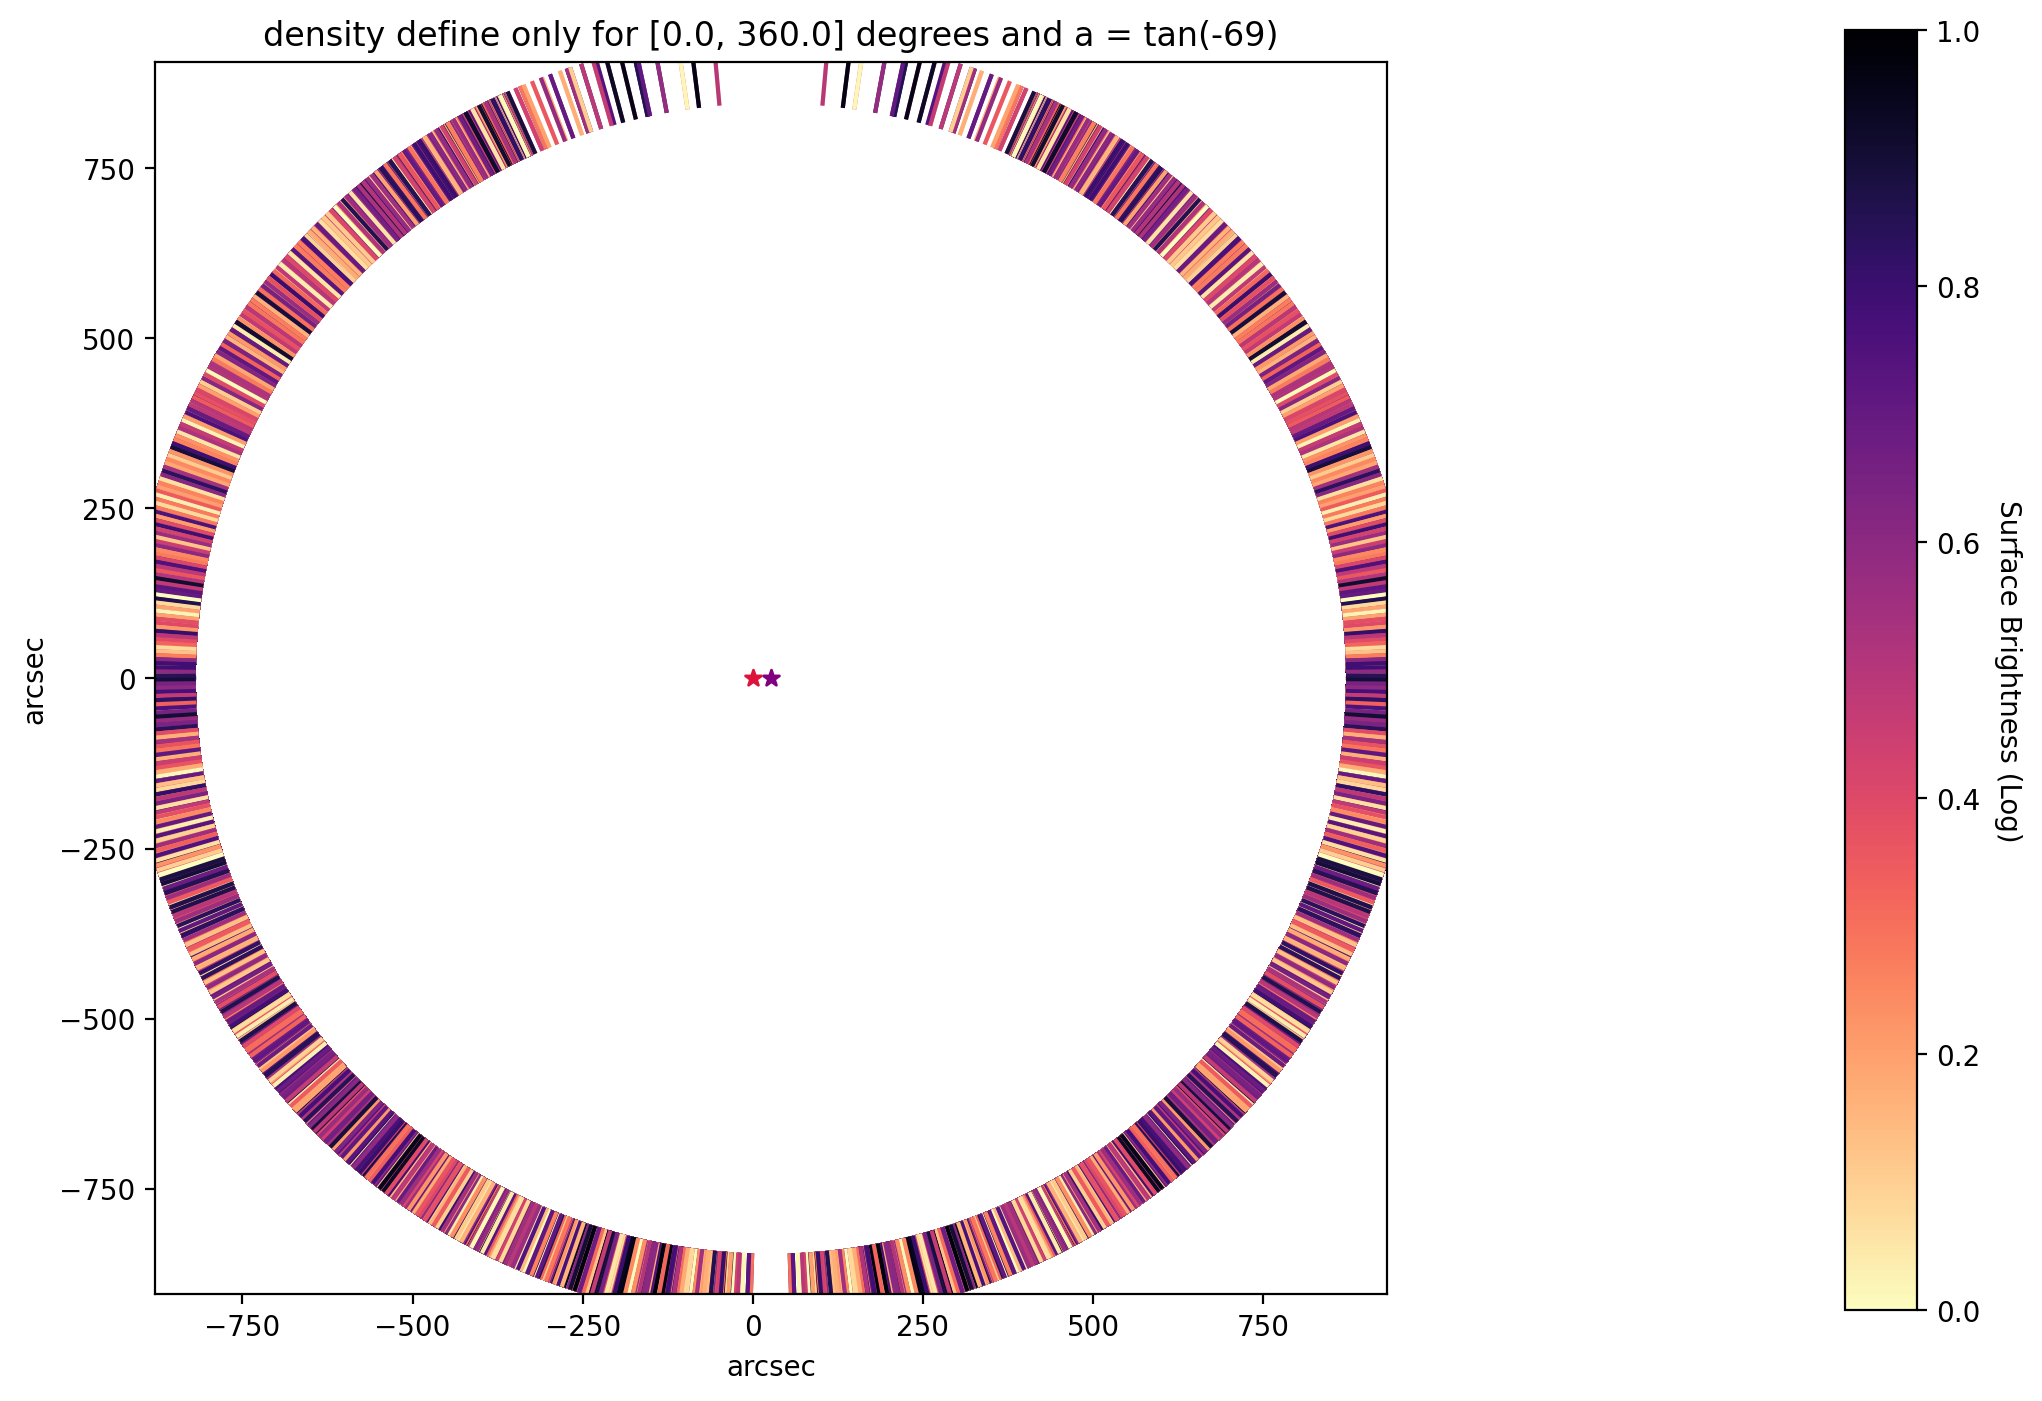

In [172]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))


surface_300_norm = ( surface.copy() - np.nanmin(surface.copy())  ) / (np.nanmax(surface.copy()) - np.nanmin(surface.copy()))
cmap = matplotlib.colormaps.get_cmap('magma_r')
normalize = matplotlib.colors.Normalize(vmin=np.nanmin(surface_300_norm), vmax=np.nanmax(surface_300_norm))



ax.set_title("density define only for %s degrees and a = tan(%s)"%([deltass.min(), deltass.max()], int(np.rad2deg(np.arctan(a)))))

r_le_arc = np.arctan(r_le / d) * (180 / np.pi) * 3600
ax.set_xlim(-act - r_le_arc - 10, -act + r_le_arc + 10)
ax.set_ylim(-r_le_arc - 10, r_le_arc + 10)

for k in range(len(surface)):
  ax.plot(new_xs[0, :, k], new_ys[0, :, k], color=cmap(normalize(surface_300_norm[k])))#, label="%s"%(z/pctoly))
  ax.plot(new_xs_h[0, :, k], new_ys_h[0, :, k], color=cmap(normalize(surface_300_norm[k])))#, label="%s"%(z/pctoly))
  # print(surface[k], cmap(normalize(surface[k])))
ax.scatter(- act, 0, marker = "*", color = "purple")
ax.scatter(0, 0, marker = "*", color = "crimson")



cbax = fig.add_axes([0.96, 0.1, 0.03, 0.80])

ax.set_xlabel("arcsec")
ax.set_ylabel("arcsec")
ax.set_box_aspect(1)

cb1 = matplotlib.colorbar.ColorbarBase(cbax, cmap=cmap, norm=normalize, orientation='vertical')
cb1.set_label("Surface Brightness (Log)", rotation=270, labelpad=15)

def label_cbrt(x,pos):
    return "{:.1f}".format(x)

cb1.formatter = matplotlib.ticker.FuncFormatter(label_cbrt)
# cb.update_ticks()
# # plt.tight_layout()
# # plt.savefig("figure2.png", dpi = 700, bbox_inches='tight')
# # print(set(legend_dust))
# plt.show()